In [1]:
import pandas as pd
cumulative = pd.read_csv("D:/Project/NASA SPACE APPS/cumulative_2025.09.17_18.01.30.csv", comment='#')
print(cumulative.head(5))

      kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2  10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
2      0.000              0              0              0              0  ...   
3      0.000              0              1              0              0  ...   
4      1.000              0              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \


In [2]:
k2pandc = pd.read_csv("D:/Project/NASA SPACE APPS/k2pandc_2025.09.17_18.02.11.csv", comment='#')
print(k2pandc.head(5))

             pl_name        hostname  default_flag disposition  \
0        BD+20 594 b       BD+20 594             0   CONFIRMED   
1        BD+20 594 b       BD+20 594             0   CONFIRMED   
2        BD+20 594 b       BD+20 594             1   CONFIRMED   
3  EPIC 201111557.01  EPIC 201111557             0   CANDIDATE   
4  EPIC 201111557.01  EPIC 201111557             1   CANDIDATE   

             disp_refname  sy_snum  sy_pnum discoverymethod  disc_year  \
0    Espinoza et al. 2016      1.0      1.0         Transit     2016.0   
1    Espinoza et al. 2016      1.0      1.0         Transit     2016.0   
2    Espinoza et al. 2016      1.0      1.0         Transit     2016.0   
3  Livingston et al. 2018      1.0      0.0         Transit     2018.0   
4  Livingston et al. 2018      1.0      0.0         Transit     2018.0   

  disc_facility  ... sy_vmagerr2  sy_kmag sy_kmagerr1  sy_kmagerr2  \
0            K2  ...      -0.012    9.368       0.018       -0.018   
1            K2  .

In [3]:
TOI_2025 = pd.read_csv("D:/Project/NASA SPACE APPS/TOI_2025.09.17_18.01.53.csv", comment='#')
print(TOI_2025.head(5))

       toi        tid tfopwg_disp         rastr          ra         decstr  \
0  1000.01   50365310          FP  07h29m25.85s  112.357708  -12d41m45.46s   
1  1001.01   88863718          PC  08h10m19.31s  122.580465  -05d30m49.87s   
2  1002.01  124709665          FP  06h58m54.47s  104.726966  -10d34m49.64s   
3  1003.01  106997505          FP  07h22m14.39s  110.559945  -25d12m25.26s   
4  1004.01  238597883          FP  08h08m42.77s  122.178195  -48d48m10.12s   

         dec  st_pmra  st_pmraerr1  st_pmraerr2  ...  st_logg  st_loggerr1  \
0 -12.695960   -5.964        0.085       -0.085  ...     4.19         0.07   
1  -5.513852   -4.956        0.102       -0.102  ...     4.03         0.09   
2 -10.580455   -1.462        0.206       -0.206  ...      NaN          NaN   
3 -25.207017   -0.939        0.041       -0.041  ...     4.15         1.64   
4 -48.802811   -4.496        0.069       -0.069  ...     4.14         0.07   

   st_loggerr2  st_logglim   st_rad  st_raderr1  st_raderr2  s

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import pickle

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Machine Learning imports
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             roc_curve, auc)
from sklearn.decomposition import PCA

# Classifiers
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              VotingClassifier, StackingClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

try:
    from xgboost import XGBClassifier

    HAVE_XGB = True
except ImportError:
    HAVE_XGB = False
    print("XGBoost not available")

try:
    from lightgbm import LGBMClassifier

    HAVE_LGB = True
except ImportError:
    HAVE_LGB = False
    print("LightGBM not available")

try:
    from imblearn.over_sampling import SMOTE

    HAVE_SMOTE = True
except ImportError:
    HAVE_SMOTE = False
    print("SMOTE not available")

print("All libraries imported successfully!")
print(f"XGBoost: {HAVE_XGB}, LightGBM: {HAVE_LGB}, SMOTE: {HAVE_SMOTE}")


All libraries imported successfully!
XGBoost: True, LightGBM: True, SMOTE: True


In [5]:
print("=" * 80)
print("LOADING DATASETS")
print("=" * 80)

LOADING DATASETS


In [6]:
# Update these paths to your actual file locations
cumulative = pd.read_csv("D:/Project/NASA SPACE APPS/cumulative_2025.09.17_18.01.30.csv", comment='#')
k2pandc = pd.read_csv("D:/Project/NASA SPACE APPS/k2pandc_2025.09.17_18.02.11.csv", comment='#')
TOI_2025 = pd.read_csv("D:/Project/NASA SPACE APPS/TOI_2025.09.17_18.01.53.csv", comment='#')

print(f"\nKepler Cumulative: {cumulative.shape}")
print(f"K2 Planets and Candidates: {k2pandc.shape}")
print(f"TESS Objects of Interest: {TOI_2025.shape}")



Kepler Cumulative: (9564, 49)
K2 Planets and Candidates: (3992, 94)
TESS Objects of Interest: (7668, 65)


In [7]:
print("\n" + "=" * 80)
print("KEPLER DATASET EXPLORATION")
print("=" * 80)

print("\nFirst 5 rows:")
print(cumulative.head())



KEPLER DATASET EXPLORATION

First 5 rows:
      kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2  10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
2      0.000              0              0              0              0  ...   
3      0.000              0              1              0              0  ...   
4      1.000              0              0              0              0  ...   

   koi_steff_err2  koi_slogg  k

In [8]:

print("\nDataset Info:")
print(cumulative.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impac

In [9]:

print("\nNumerical Statistics:")
print(cumulative.describe())



Numerical Statistics:
              kepid    koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
count  9.564000e+03  8054.000000    9564.000000    9564.000000    9564.000000   
mean   7.690628e+06     0.480829       0.208595       0.232748       0.197512   
std    2.653459e+06     0.476928       4.767290       0.422605       0.398142   
min    7.574500e+05     0.000000       0.000000       0.000000       0.000000   
25%    5.556034e+06     0.000000       0.000000       0.000000       0.000000   
50%    7.906892e+06     0.334000       0.000000       0.000000       0.000000   
75%    9.873066e+06     0.998000       0.000000       0.000000       0.000000   
max    1.293514e+07     1.000000     465.000000       1.000000       1.000000   

       koi_fpflag_ec     koi_period  koi_period_err1  koi_period_err2  \
count    9564.000000    9564.000000      9110.000000      9110.000000   
mean        0.120033      75.671358         0.002148        -0.002148   
std         0.325018    1334

In [10]:

print("\nMissing Values:")
missing_kepler = cumulative.isnull().sum()
missing_kepler = missing_kepler[missing_kepler > 0].sort_values(ascending=False)
print(missing_kepler)


Missing Values:
koi_teq_err1         9564
koi_teq_err2         9564
kepler_name          6817
koi_score            1510
koi_steff_err2        483
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad_err2         468
koi_steff_err1        468
koi_srad_err1         468
koi_period_err2       454
koi_period_err1       454
koi_depth_err1        454
koi_depth_err2        454
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_duration_err2     454
koi_duration_err1     454
koi_impact_err1       454
koi_impact_err2       454
koi_prad_err2         363
koi_teq               363
koi_prad              363
koi_prad_err1         363
koi_impact            363
koi_depth             363
koi_steff             363
koi_model_snr         363
koi_srad              363
koi_slogg             363
koi_tce_delivname     346
koi_tce_plnt_num      346
koi_insol_err1        321
koi_insol             321
koi_insol_err2        321
koi_kepmag              1
dtype: int64


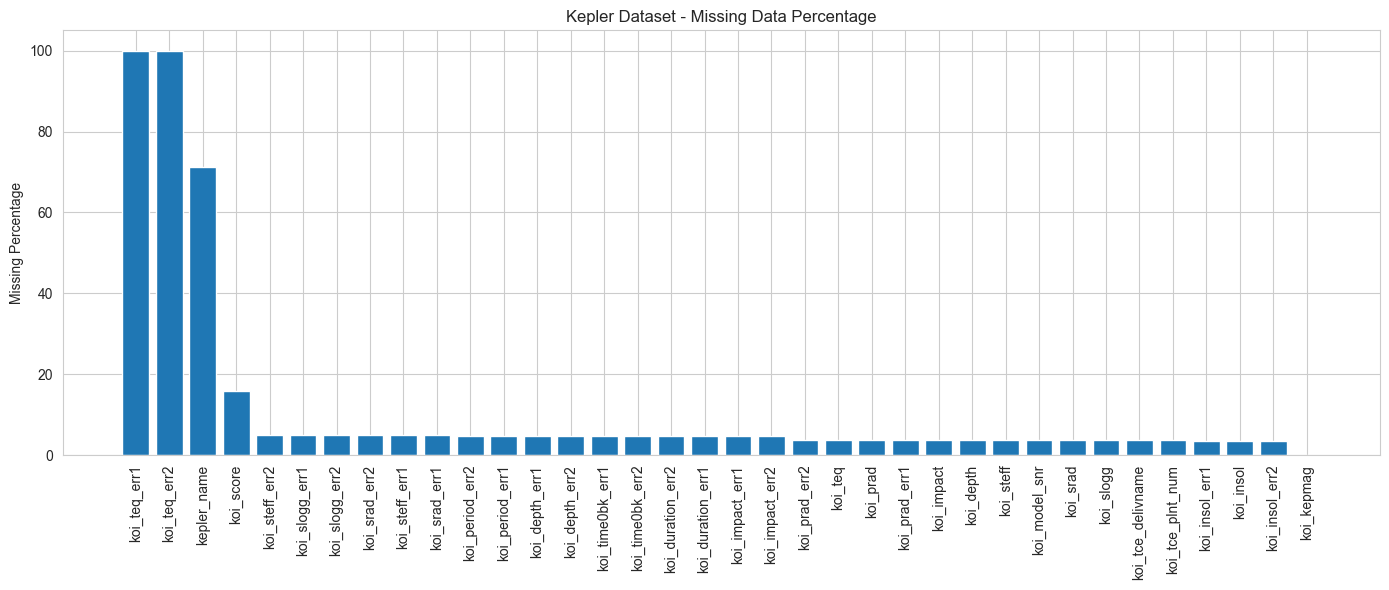

In [11]:
# Visualize missing data
plt.figure(figsize=(14, 6))
missing_pct = (cumulative.isnull().sum() / len(cumulative)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
plt.bar(range(len(missing_pct)), missing_pct.values)
plt.xticks(range(len(missing_pct)), missing_pct.index, rotation=90)
plt.ylabel('Missing Percentage')
plt.title('Kepler Dataset - Missing Data Percentage')
plt.tight_layout()
plt.show()



Target Distribution (koi_disposition):
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64


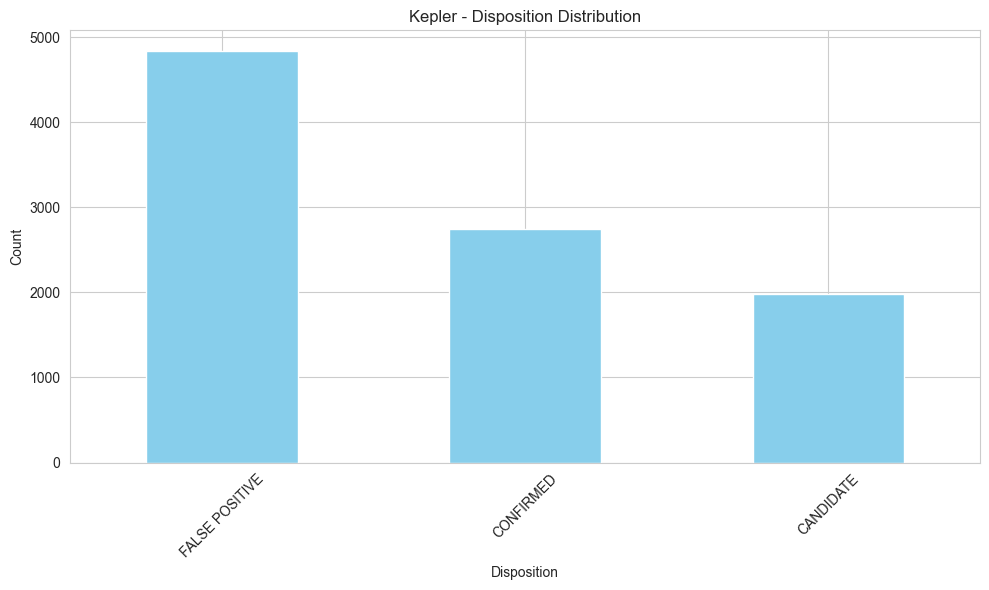

In [12]:
# Target distribution
if 'koi_disposition' in cumulative.columns:
    print("\nTarget Distribution (koi_disposition):")
    print(cumulative['koi_disposition'].value_counts())

    plt.figure(figsize=(10, 6))
    cumulative['koi_disposition'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Kepler - Disposition Distribution')
    plt.xlabel('Disposition')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
print("\n" + "=" * 80)
print("K2 DATASET EXPLORATION")
print("=" * 80)

print("\nFirst 5 rows:")
print(k2pandc.head())



K2 DATASET EXPLORATION

First 5 rows:
             pl_name        hostname  default_flag disposition  \
0        BD+20 594 b       BD+20 594             0   CONFIRMED   
1        BD+20 594 b       BD+20 594             0   CONFIRMED   
2        BD+20 594 b       BD+20 594             1   CONFIRMED   
3  EPIC 201111557.01  EPIC 201111557             0   CANDIDATE   
4  EPIC 201111557.01  EPIC 201111557             1   CANDIDATE   

             disp_refname  sy_snum  sy_pnum discoverymethod  disc_year  \
0    Espinoza et al. 2016      1.0      1.0         Transit     2016.0   
1    Espinoza et al. 2016      1.0      1.0         Transit     2016.0   
2    Espinoza et al. 2016      1.0      1.0         Transit     2016.0   
3  Livingston et al. 2018      1.0      0.0         Transit     2018.0   
4  Livingston et al. 2018      1.0      0.0         Transit     2018.0   

  disc_facility  ... sy_vmagerr2  sy_kmag sy_kmagerr1  sy_kmagerr2  \
0            K2  ...      -0.012    9.368       0

In [14]:

print("\nDataset Info:")
print(k2pandc.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 94 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          3992 non-null   object 
 1   hostname         3992 non-null   object 
 2   default_flag     3992 non-null   int64  
 3   disposition      3992 non-null   object 
 4   disp_refname     3992 non-null   object 
 5   sy_snum          3975 non-null   float64
 6   sy_pnum          3975 non-null   float64
 7   discoverymethod  3975 non-null   object 
 8   disc_year        3975 non-null   float64
 9   disc_facility    3975 non-null   object 
 10  soltype          3975 non-null   object 
 11  pl_controv_flag  3975 non-null   float64
 12  pl_refname       3975 non-null   object 
 13  pl_orbper        3925 non-null   float64
 14  pl_orbpererr1    3040 non-null   float64
 15  pl_orbpererr2    3040 non-null   float64
 16  pl_orbperlim     3925 non-null   float64
 17 

In [15]:

print("\nNumerical Statistics:")
print(k2pandc.describe())



Numerical Statistics:
       default_flag      sy_snum      sy_pnum    disc_year  pl_controv_flag  \
count   3992.000000  3975.000000  3975.000000  3975.000000      3975.000000   
mean       0.452405     1.051572     1.128553  2017.554969         0.000252   
std        0.497792     0.253028     1.385026     2.034166         0.015861   
min        0.000000     1.000000     0.000000  2011.000000         0.000000   
25%        0.000000     1.000000     0.000000  2016.000000         0.000000   
50%        0.000000     1.000000     1.000000  2018.000000         0.000000   
75%        1.000000     1.000000     2.000000  2018.500000         0.000000   
max        1.000000     3.000000     7.000000  2025.000000         1.000000   

          pl_orbper  pl_orbpererr1  pl_orbpererr2  pl_orbperlim  pl_orbsmax  \
count   3925.000000    3040.000000    3040.000000   3925.000000  812.000000   
mean      40.582169      14.334552      -9.239334     -0.000764    0.105402   
std     1348.724307     580.

In [16]:

print("\nMissing Values:")
missing_k2 = k2pandc.isnull().sum()
missing_k2 = missing_k2[missing_k2 > 0].sort_values(ascending=False)
print(missing_k2)


Missing Values:
pl_orbeccenerr2    3766
pl_orbeccenerr1    3766
pl_bmasseerr1      3606
pl_bmasseerr2      3606
pl_bmassjerr2      3606
                   ... 
discoverymethod      17
disc_facility        17
soltype              17
pl_controv_flag      17
pl_refname           17
Length: 89, dtype: int64


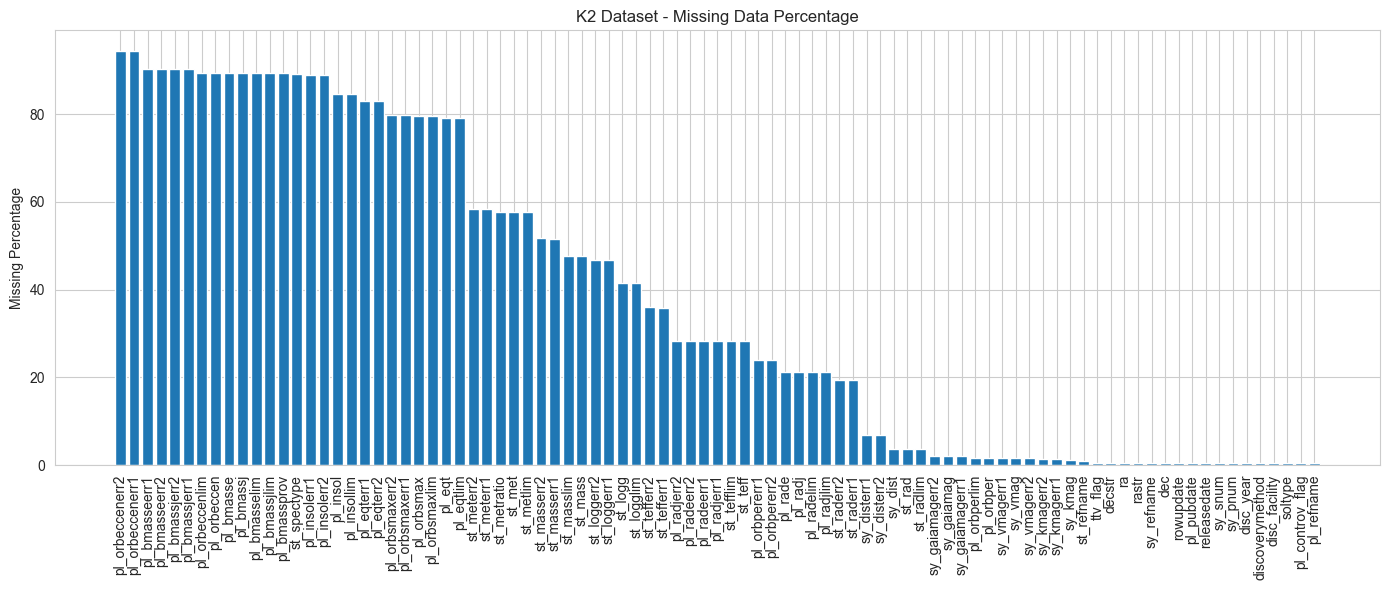

In [17]:
# Visualize missing data
plt.figure(figsize=(14, 6))
missing_pct_k2 = (k2pandc.isnull().sum() / len(k2pandc)) * 100
missing_pct_k2 = missing_pct_k2[missing_pct_k2 > 0].sort_values(ascending=False)
if len(missing_pct_k2) > 0:
    plt.bar(range(len(missing_pct_k2)), missing_pct_k2.values)
    plt.xticks(range(len(missing_pct_k2)), missing_pct_k2.index, rotation=90)
    plt.ylabel('Missing Percentage')
    plt.title('K2 Dataset - Missing Data Percentage')
    plt.tight_layout()
    plt.show()

In [18]:
print("\n" + "=" * 80)
print("TESS DATASET EXPLORATION")
print("=" * 80)

print("\nFirst 5 rows:")
print(TOI_2025.head())



TESS DATASET EXPLORATION

First 5 rows:
       toi        tid tfopwg_disp         rastr          ra         decstr  \
0  1000.01   50365310          FP  07h29m25.85s  112.357708  -12d41m45.46s   
1  1001.01   88863718          PC  08h10m19.31s  122.580465  -05d30m49.87s   
2  1002.01  124709665          FP  06h58m54.47s  104.726966  -10d34m49.64s   
3  1003.01  106997505          FP  07h22m14.39s  110.559945  -25d12m25.26s   
4  1004.01  238597883          FP  08h08m42.77s  122.178195  -48d48m10.12s   

         dec  st_pmra  st_pmraerr1  st_pmraerr2  ...  st_logg  st_loggerr1  \
0 -12.695960   -5.964        0.085       -0.085  ...     4.19         0.07   
1  -5.513852   -4.956        0.102       -0.102  ...     4.03         0.09   
2 -10.580455   -1.462        0.206       -0.206  ...      NaN          NaN   
3 -25.207017   -0.939        0.041       -0.041  ...     4.15         1.64   
4 -48.802811   -4.496        0.069       -0.069  ...     4.14         0.07   

   st_loggerr2  st_lo

In [19]:

print("\nDataset Info:")
print(TOI_2025.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   toi              7668 non-null   float64
 1   tid              7668 non-null   int64  
 2   tfopwg_disp      7668 non-null   object 
 3   rastr            7668 non-null   object 
 4   ra               7668 non-null   float64
 5   decstr           7668 non-null   object 
 6   dec              7668 non-null   float64
 7   st_pmra          7534 non-null   float64
 8   st_pmraerr1      7534 non-null   float64
 9   st_pmraerr2      7534 non-null   float64
 10  st_pmralim       7534 non-null   float64
 11  st_pmdec         7534 non-null   float64
 12  st_pmdecerr1     7534 non-null   float64
 13  st_pmdecerr2     7534 non-null   float64
 14  st_pmdeclim      7534 non-null   float64
 15  pl_tranmid       7668 non-null   float64
 16  pl_tranmiderr1   7657 non-null   float64
 17 

In [20]:

print("\nNumerical Statistics:")
print(TOI_2025.describe())



Numerical Statistics:
               toi           tid           ra          dec      st_pmra  \
count  7668.000000  7.668000e+03  7668.000000  7668.000000  7534.000000   
mean   3731.951026  2.457119e+08   179.324443     1.277669    -0.611784   
std    2142.315067  1.617777e+08   103.604460    47.525910    77.170619   
min     101.010000  2.876000e+03     0.084680   -89.471513 -1624.050000   
25%    1852.760000  1.315815e+08    95.814138   -43.378698   -10.653750   
50%    3718.510000  2.502482e+08   160.817573     5.190404    -1.590000   
75%    5590.260000  3.542017e+08   282.181029    44.025661     8.205250   
max    7475.010000  2.041563e+09   359.941195    89.086923  2074.520000   

       st_pmraerr1  st_pmraerr2  st_pmralim     st_pmdec  st_pmdecerr1  ...  \
count  7534.000000  7534.000000      7534.0  7534.000000   7534.000000  ...   
mean      0.229226    -0.229226         0.0    -9.166144      0.223250  ...   
std       0.633257     0.633257         0.0    66.984011      0.

In [21]:

print("\nMissing Values:")
missing_tess = TOI_2025.isnull().sum()
missing_tess = missing_tess[missing_tess > 0].sort_values(ascending=False)
print(missing_tess)


Missing Values:
pl_eqterr1         7668
pl_insolerr2       7668
pl_eqtlim          7668
pl_eqterr2         7668
pl_insolerr1       7668
pl_insollim        7668
st_loggerr2        2257
st_loggerr1        2257
st_raderr1         1950
st_raderr2         1950
pl_radeerr1        1621
pl_radeerr2        1621
st_logg             856
st_disterr1         706
st_disterr2         706
st_rad              505
pl_rade             504
st_tefferr1         473
st_tefferr2         473
pl_eqt              311
st_dist             215
pl_insol            176
st_teff             161
st_pmra             134
st_pmdeclim         134
st_pmdecerr2        134
st_pmdecerr1        134
st_pmdec            134
st_pmralim          134
st_pmraerr2         134
st_pmraerr1         134
pl_orbpererr1       130
pl_orbpererr2       130
pl_orbper           106
pl_trandurherr2      13
pl_trandurherr1      13
pl_tranmiderr1       11
pl_tranmiderr2       11
pl_trandeperr2        6
pl_trandeperr1        6
dtype: int64


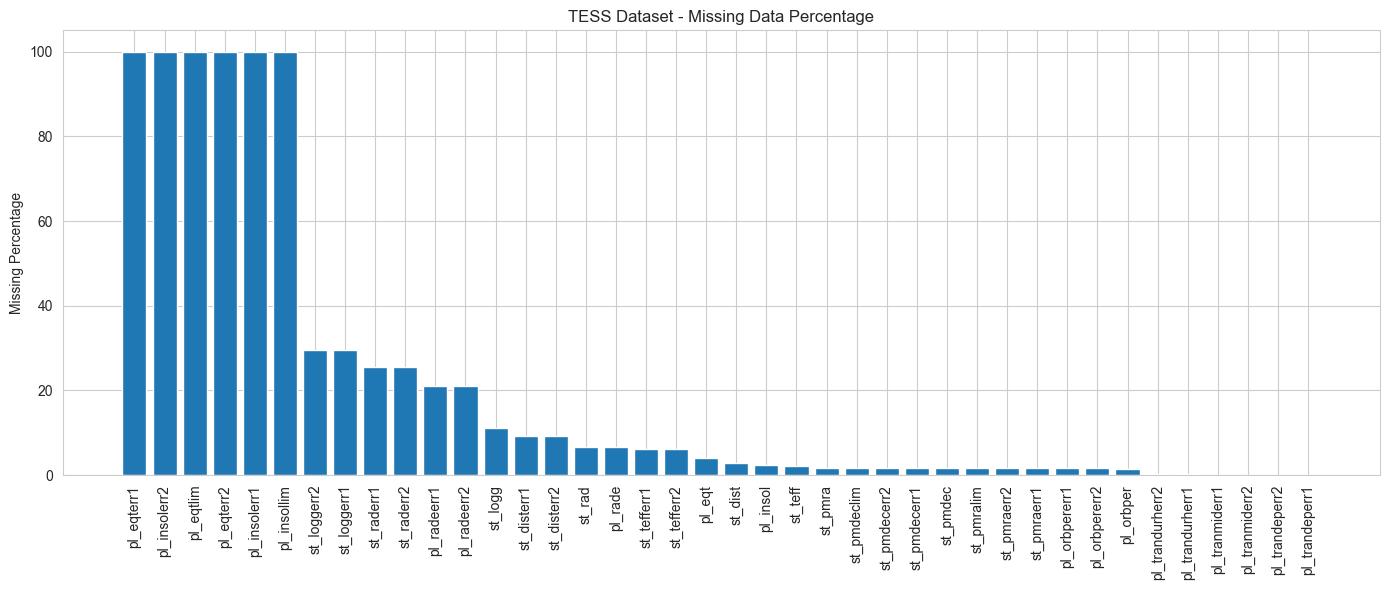

In [22]:
# Visualize missing data
plt.figure(figsize=(14, 6))
missing_pct_tess = (TOI_2025.isnull().sum() / len(TOI_2025)) * 100
missing_pct_tess = missing_pct_tess[missing_pct_tess > 0].sort_values(ascending=False)
if len(missing_pct_tess) > 0:
    plt.bar(range(len(missing_pct_tess)), missing_pct_tess.values)
    plt.xticks(range(len(missing_pct_tess)), missing_pct_tess.index, rotation=90)
    plt.ylabel('Missing Percentage')
    plt.title('TESS Dataset - Missing Data Percentage')
    plt.tight_layout()
    plt.show()


Target Distribution (tfopwg_disp):
tfopwg_disp
PC     4675
FP     1192
CP      679
KP      565
APC     459
FA       98
Name: count, dtype: int64


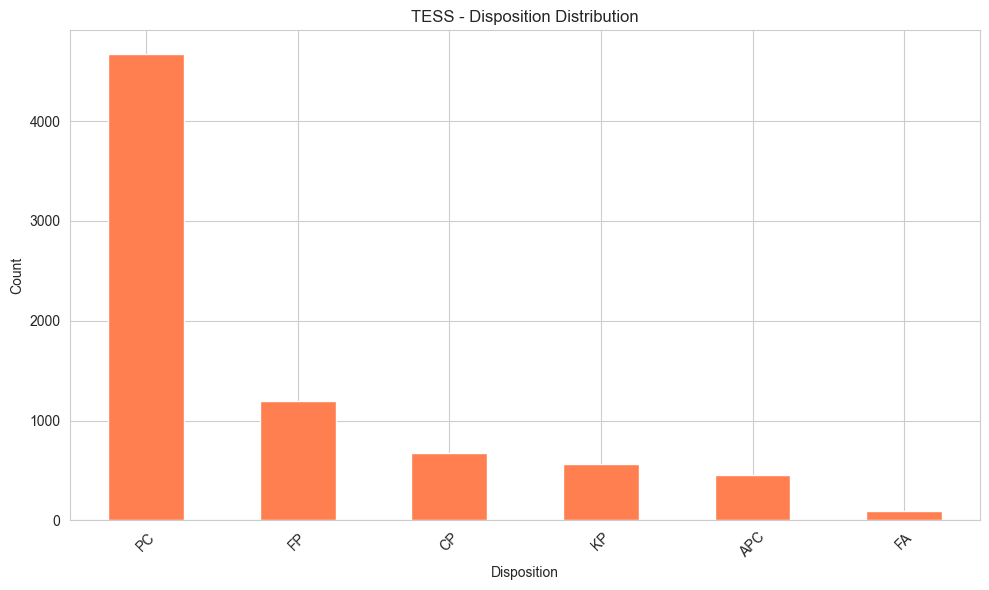

In [23]:
# Target distribution
if 'tfopwg_disp' in TOI_2025.columns:
    print("\nTarget Distribution (tfopwg_disp):")
    print(TOI_2025['tfopwg_disp'].value_counts())

    plt.figure(figsize=(10, 6))
    TOI_2025['tfopwg_disp'].value_counts().plot(kind='bar', color='coral')
    plt.title('TESS - Disposition Distribution')
    plt.xlabel('Disposition')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [24]:
print("\n" + "=" * 80)
print("STANDARDIZING COLUMN NAMES")
print("=" * 80)


STANDARDIZING COLUMN NAMES


In [25]:
def standardize_kepler(df):
    """Standardize Kepler dataset columns"""
    df_std = df.copy()

    rename_dict = {
        'koi_period': 'orbital_period',
        'koi_prad': 'planet_radius',
        'koi_depth': 'transit_depth',
        'koi_duration': 'transit_duration',
        'koi_steff': 'star_temp',
        'koi_srad': 'star_radius',
        'koi_teq': 'equilibrium_temp',
        'koi_insol': 'insolation_flux',
        'koi_model_snr': 'signal_to_noise',
        'koi_disposition': 'disposition',
        'koi_score': 'koi_score',
        'koi_slogg': 'star_logg'
    }

    df_std = df_std.rename(columns={k: v for k, v in rename_dict.items() if k in df_std.columns})
    df_std['data_source'] = 'kepler'

    print(f"Kepler standardized: {df_std.shape}")
    return df_std


In [26]:
def standardize_k2(df):
    """Standardize K2 dataset columns"""
    df_std = df.copy()

    rename_dict = {
        'pl_orbper': 'orbital_period',
        'pl_rade': 'planet_radius',
        'pl_trandep': 'transit_depth',
        'pl_trandurh': 'transit_duration',
        'st_teff': 'star_temp',
        'st_rad': 'star_radius',
        'pl_eqt': 'equilibrium_temp',
        'st_lum': 'star_luminosity',
        'st_logg': 'star_logg',
        'st_mass': 'star_mass',
        'pl_bmasse': 'planet_mass_earth',
        'pl_bmassj': 'planet_mass_jupiter'
    }

    df_std = df_std.rename(columns={k: v for k, v in rename_dict.items() if k in df_std.columns})

    # Handle disposition
    if 'koi_disposition' in df_std.columns:
        df_std['disposition'] = df_std['koi_disposition']
    else:
        df_std['disposition'] = 'CANDIDATE'

    df_std['data_source'] = 'k2'

    print(f"K2 standardized: {df_std.shape}")
    return df_std

In [27]:
def standardize_tess(df):
    """Standardize TESS dataset columns"""
    df_std = df.copy()

    rename_dict = {
        'pl_orbper': 'orbital_period',
        'pl_rade': 'planet_radius',
        'pl_trandep': 'transit_depth',
        'pl_trandurh': 'transit_duration',
        'st_teff': 'star_temp',
        'st_rad': 'star_radius',
        'pl_eqt': 'equilibrium_temp',
        'st_lum': 'star_luminosity',
        'st_logg': 'star_logg',
        'st_mass': 'star_mass',
        'st_met': 'star_metallicity',
        'tfopwg_disp': 'disposition'
    }

    df_std = df_std.rename(columns={k: v for k, v in rename_dict.items() if k in df_std.columns})
    df_std['data_source'] = 'tess'

    print(f"TESS standardized: {df_std.shape}")
    return df_std

In [28]:
# Apply standardization
kepler_std = standardize_kepler(cumulative)
k2_std = standardize_k2(k2pandc)
tess_std = standardize_tess(TOI_2025)

Kepler standardized: (9564, 50)
K2 standardized: (3992, 95)
TESS standardized: (7668, 66)


In [29]:
print("\n" + "=" * 80)
print("MAPPING DISPOSITIONS TO THREE CLASSES")
print("=" * 80)


MAPPING DISPOSITIONS TO THREE CLASSES


In [30]:
def map_disposition_to_three_classes(disposition):
    """Map various disposition values to three classes"""
    if pd.isna(disposition):
        return 'UNKNOWN'

    disp_str = str(disposition).upper()

    # Confirmed planets
    if any(keyword in disp_str for keyword in ['CONFIRMED', 'KP', 'PC']):
        return 'CONFIRMED'

    # Candidates
    if any(keyword in disp_str for keyword in ['CANDIDATE', 'CP']):
        return 'CANDIDATE'

    # False positives
    if any(keyword in disp_str for keyword in ['FALSE', 'FP', 'NOT', 'EB']):
        return 'FALSE_POSITIVE'

    return 'UNKNOWN'


In [31]:
# Apply mapping
kepler_std['label'] = kepler_std['disposition'].apply(map_disposition_to_three_classes)
k2_std['label'] = k2_std['disposition'].apply(map_disposition_to_three_classes)
tess_std['label'] = tess_std['disposition'].apply(map_disposition_to_three_classes)


In [32]:
print("\nKepler label distribution:")
print(kepler_std['label'].value_counts())



Kepler label distribution:
label
FALSE_POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64


In [33]:
print("\nK2 label distribution:")
print(k2_std['label'].value_counts())



K2 label distribution:
label
CANDIDATE    3992
Name: count, dtype: int64


In [34]:
print("\nTESS label distribution:")
print(tess_std['label'].value_counts())



TESS label distribution:
label
CONFIRMED         5699
FALSE_POSITIVE    1192
CANDIDATE          679
UNKNOWN             98
Name: count, dtype: int64


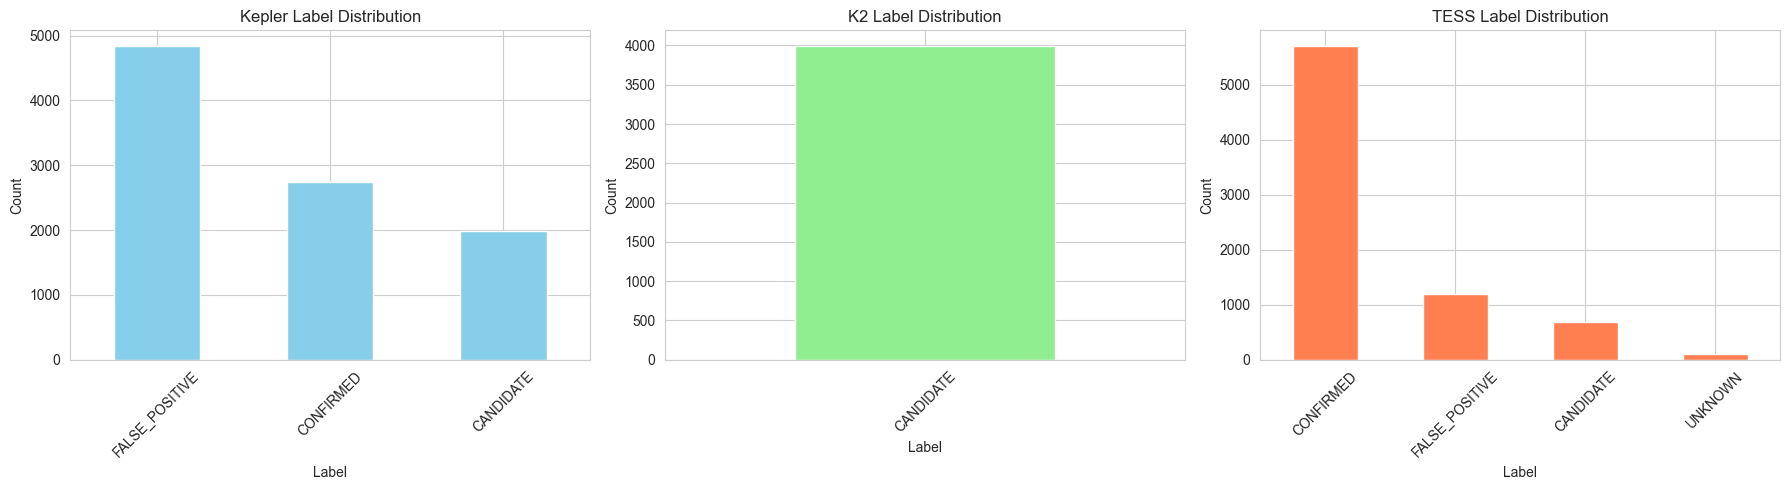

In [35]:
# Visualize label distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

kepler_std['label'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Kepler Label Distribution')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

k2_std['label'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('K2 Label Distribution')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

tess_std['label'].value_counts().plot(kind='bar', ax=axes[2], color='coral')
axes[2].set_title('TESS Label Distribution')
axes[2].set_xlabel('Label')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [36]:
print("\n" + "=" * 80)
print("MERGING DATASETS")
print("=" * 80)


MERGING DATASETS


In [37]:
# Define common features to use
feature_cols = [
    'orbital_period', 'planet_radius', 'transit_depth', 'transit_duration',
    'star_temp', 'star_radius', 'equilibrium_temp', 'insolation_flux',
    'signal_to_noise', 'star_logg', 'star_mass', 'planet_mass_earth',
    'planet_mass_jupiter', 'star_luminosity', 'star_metallicity', 'koi_score'
]


In [38]:
def select_features(df, feature_list):
    """Select available features from dataframe"""
    available_features = [col for col in feature_list if col in df.columns]
    selected_df = df[available_features + ['label', 'data_source']].copy()
    return selected_df


kepler_selected = select_features(kepler_std, feature_cols)
k2_selected = select_features(k2_std, feature_cols)
tess_selected = select_features(tess_std, feature_cols)


In [39]:
print(f"\nKepler selected features: {kepler_selected.shape}")
print(f"K2 selected features: {k2_selected.shape}")
print(f"TESS selected features: {tess_selected.shape}")



Kepler selected features: (9564, 13)
K2 selected features: (3992, 11)
TESS selected features: (7668, 10)


In [40]:
# Merge all datasets
merged_data = pd.concat([kepler_selected, k2_selected, tess_selected],
                        ignore_index=True, sort=False)

print(f"\nMerged dataset: {merged_data.shape}")


Merged dataset: (21224, 16)


In [41]:
# Remove UNKNOWN labels
merged_data = merged_data[merged_data['label'] != 'UNKNOWN'].reset_index(drop=True)

print(f"After removing UNKNOWN: {merged_data.shape}")


After removing UNKNOWN: (21126, 16)


In [42]:
print("\nFinal label distribution:")
print(merged_data['label'].value_counts())



Final label distribution:
label
CONFIRMED         8445
CANDIDATE         6650
FALSE_POSITIVE    6031
Name: count, dtype: int64


In [43]:

print("\nPercentage distribution:")
print((merged_data['label'].value_counts() / len(merged_data) * 100).round(2))



Percentage distribution:
label
CONFIRMED         39.97
CANDIDATE         31.48
FALSE_POSITIVE    28.55
Name: count, dtype: float64


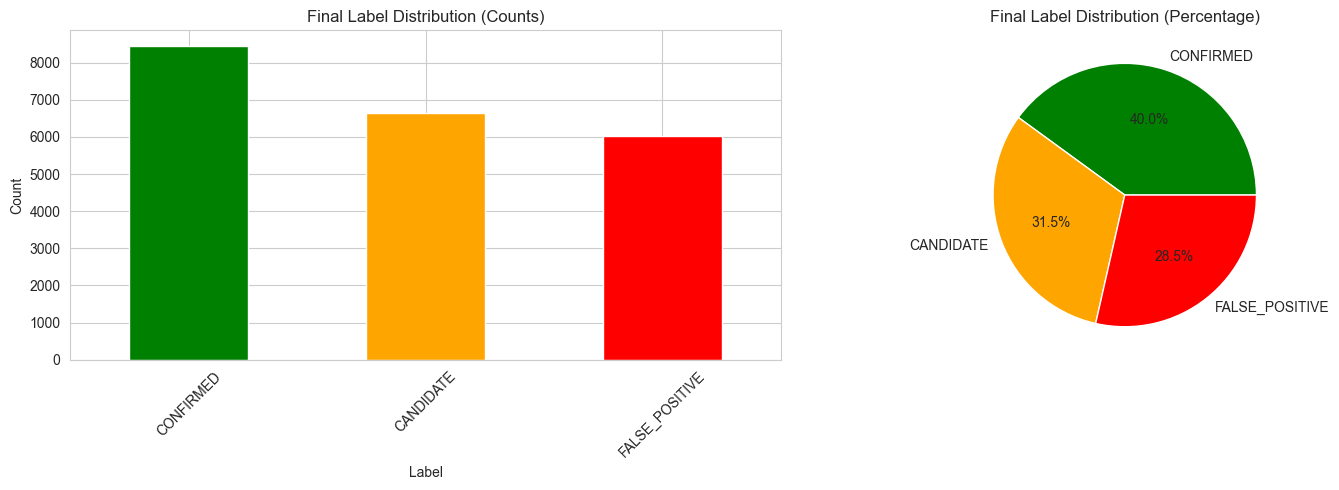

In [44]:

# Visualize final distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

merged_data['label'].value_counts().plot(kind='bar', ax=ax1, color=['green', 'orange', 'red'])
ax1.set_title('Final Label Distribution (Counts)')
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

merged_data['label'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%',
                                         colors=['green', 'orange', 'red'])
ax2.set_title('Final Label Distribution (Percentage)')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [45]:
print("\n" + "=" * 80)
print("HANDLING MISSING VALUES")
print("=" * 80)


HANDLING MISSING VALUES


In [46]:
print("\nMissing values before imputation:")
missing_before = merged_data.isnull().sum()
missing_before = missing_before[missing_before > 0].sort_values(ascending=False)
print(missing_before)


Missing values before imputation:
planet_mass_jupiter    20698
planet_mass_earth      20698
star_mass              19037
koi_score              13072
signal_to_noise        11925
insolation_flux        11883
transit_depth           4355
transit_duration        3992
equilibrium_temp        3824
star_logg               2848
planet_radius           1700
star_temp               1645
star_radius             1004
orbital_period           169
dtype: int64


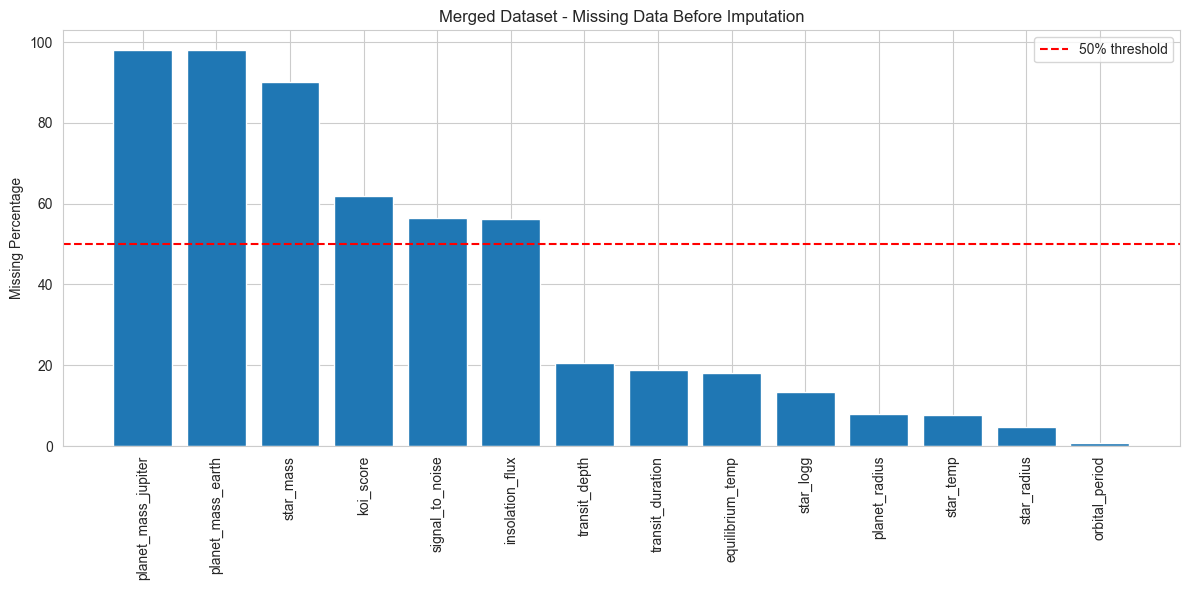

In [47]:
# Visualize missing data
plt.figure(figsize=(12, 6))
missing_pct_merged = (merged_data.isnull().sum() / len(merged_data)) * 100
missing_pct_merged = missing_pct_merged[missing_pct_merged > 0].sort_values(ascending=False)
plt.bar(range(len(missing_pct_merged)), missing_pct_merged.values)
plt.xticks(range(len(missing_pct_merged)), missing_pct_merged.index, rotation=90)
plt.ylabel('Missing Percentage')
plt.title('Merged Dataset - Missing Data Before Imputation')
plt.axhline(y=50, color='r', linestyle='--', label='50% threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
# Separate numeric and categorical columns
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns.tolist()
# Remove label from numeric if present
numeric_cols = [col for col in numeric_cols if col not in ['label', 'data_source']]

print(f"\nNumeric columns to impute: {len(numeric_cols)}")



Numeric columns to impute: 14


In [49]:

# Impute numeric columns with median
imputer = SimpleImputer(strategy='median')
merged_data[numeric_cols] = imputer.fit_transform(merged_data[numeric_cols])

print("\nMissing values after imputation:")
missing_after = merged_data.isnull().sum()
missing_after = missing_after[missing_after > 0]
print(missing_after if len(missing_after) > 0 else "No missing values!")



Missing values after imputation:
No missing values!


In [50]:
print("\n" + "=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)


FEATURE ENGINEERING


In [51]:
df_engineered = merged_data.copy()

# Log transformations for skewed features
if 'orbital_period' in df_engineered.columns:
    df_engineered['log_orbital_period'] = np.log1p(df_engineered['orbital_period'])

if 'transit_depth' in df_engineered.columns:
    df_engineered['log_transit_depth'] = np.log1p(df_engineered['transit_depth'])

if 'signal_to_noise' in df_engineered.columns:
    df_engineered['log_snr'] = np.log1p(df_engineered['signal_to_noise'])

# Interaction features
if 'planet_radius' in df_engineered.columns and 'star_radius' in df_engineered.columns:
    df_engineered['radius_ratio'] = df_engineered['planet_radius'] / (df_engineered['star_radius'] + 1e-10)

if 'orbital_period' in df_engineered.columns and 'planet_radius' in df_engineered.columns:
    df_engineered['period_radius_product'] = df_engineered['orbital_period'] * df_engineered['planet_radius']

if 'star_temp' in df_engineered.columns and 'star_radius' in df_engineered.columns:
    df_engineered['luminosity_proxy'] = (df_engineered['star_radius'] ** 2) * ((df_engineered['star_temp'] / 5778) ** 4)


In [52]:
# Data source encoding
df_engineered['is_kepler'] = (df_engineered['data_source'] == 'kepler').astype(int)
df_engineered['is_k2'] = (df_engineered['data_source'] == 'k2').astype(int)
df_engineered['is_tess'] = (df_engineered['data_source'] == 'tess').astype(int)

print(f"\nEngineered features added: {df_engineered.shape[1] - merged_data.shape[1]}")
print(f"Total features: {df_engineered.shape[1]}")



Engineered features added: 9
Total features: 25


In [53]:
print("\n" + "=" * 80)
print("FEATURE DISTRIBUTION VISUALIZATION")
print("=" * 80)


FEATURE DISTRIBUTION VISUALIZATION


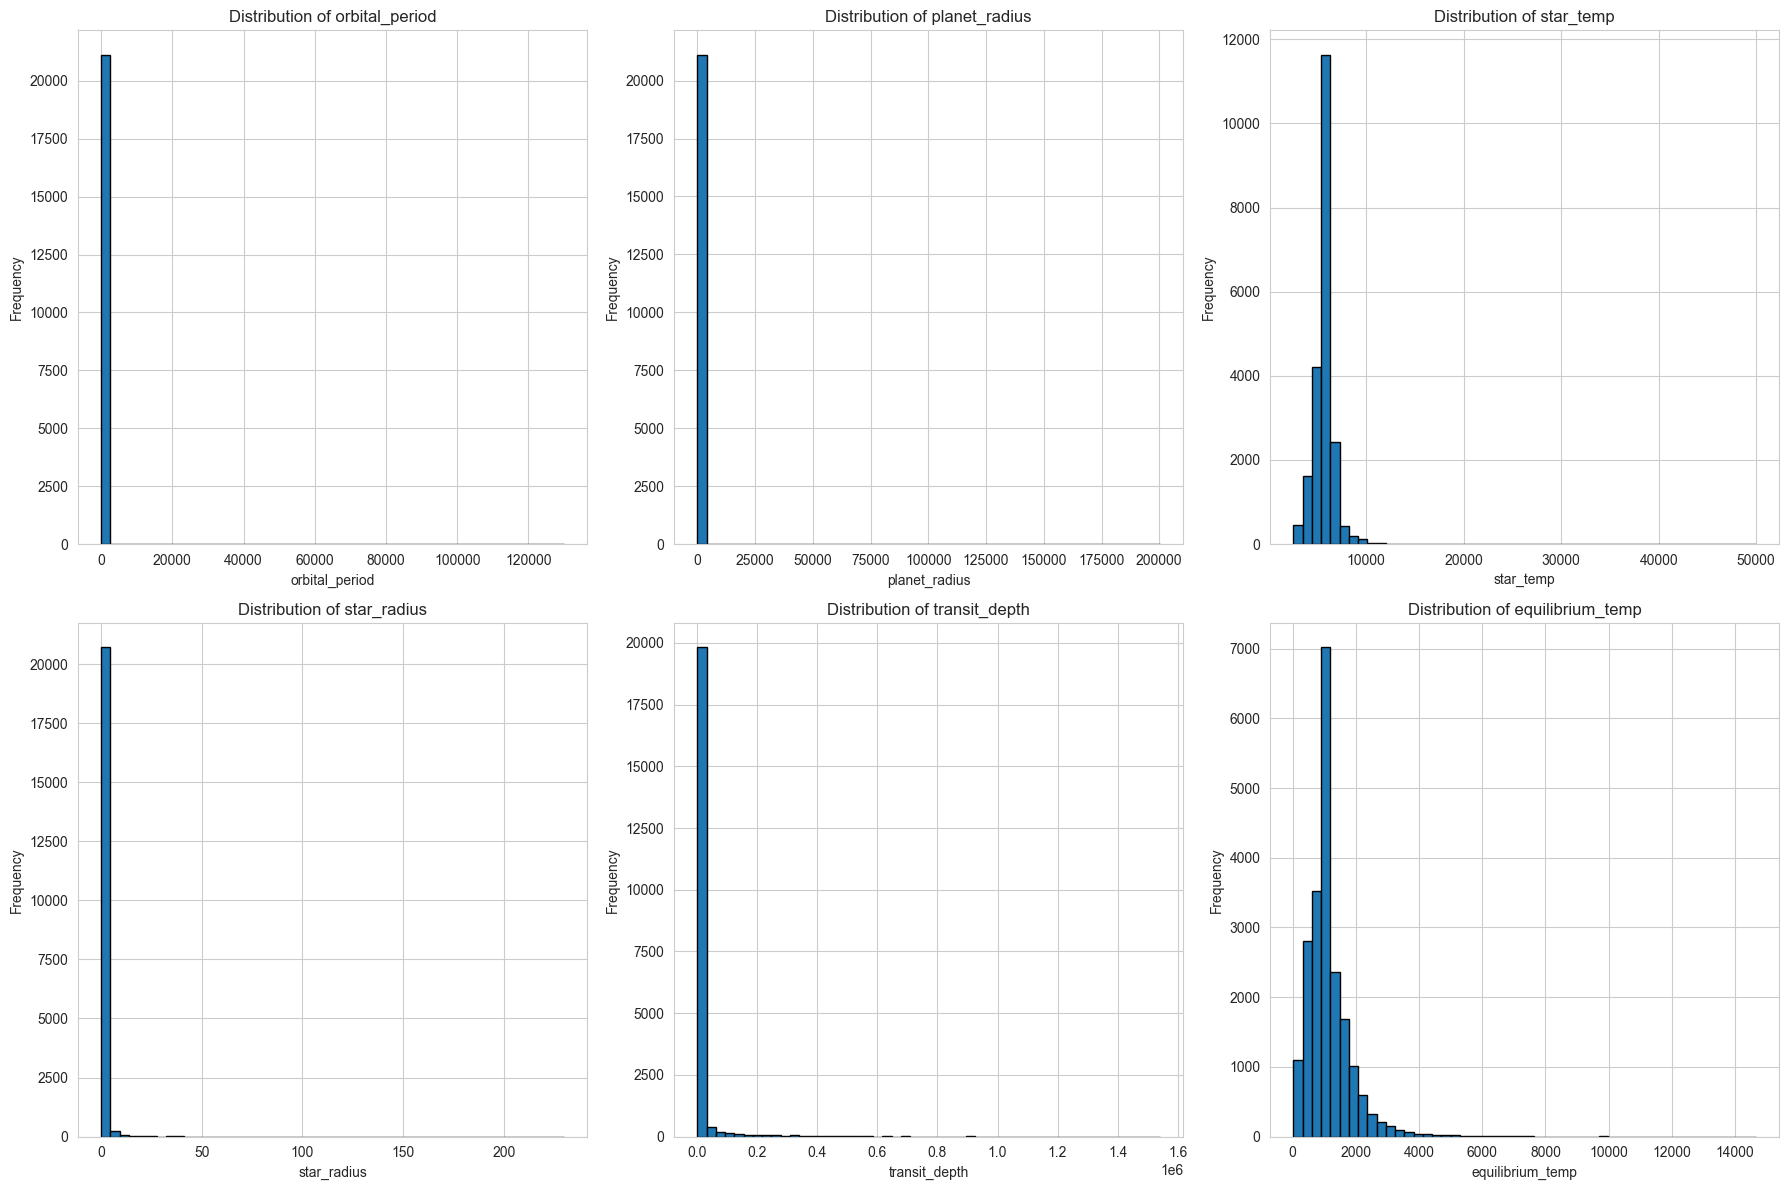

In [54]:
# Select key features for visualization
viz_features = ['orbital_period', 'planet_radius', 'star_temp', 'star_radius',
                'transit_depth', 'equilibrium_temp']
available_viz = [f for f in viz_features if f in df_engineered.columns]

if len(available_viz) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for idx, feature in enumerate(available_viz[:6]):
        df_engineered[feature].hist(bins=50, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'Distribution of {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [55]:
print("\n" + "=" * 80)
print("FEATURE RELATIONSHIPS WITH TARGET")
print("=" * 80)


FEATURE RELATIONSHIPS WITH TARGET


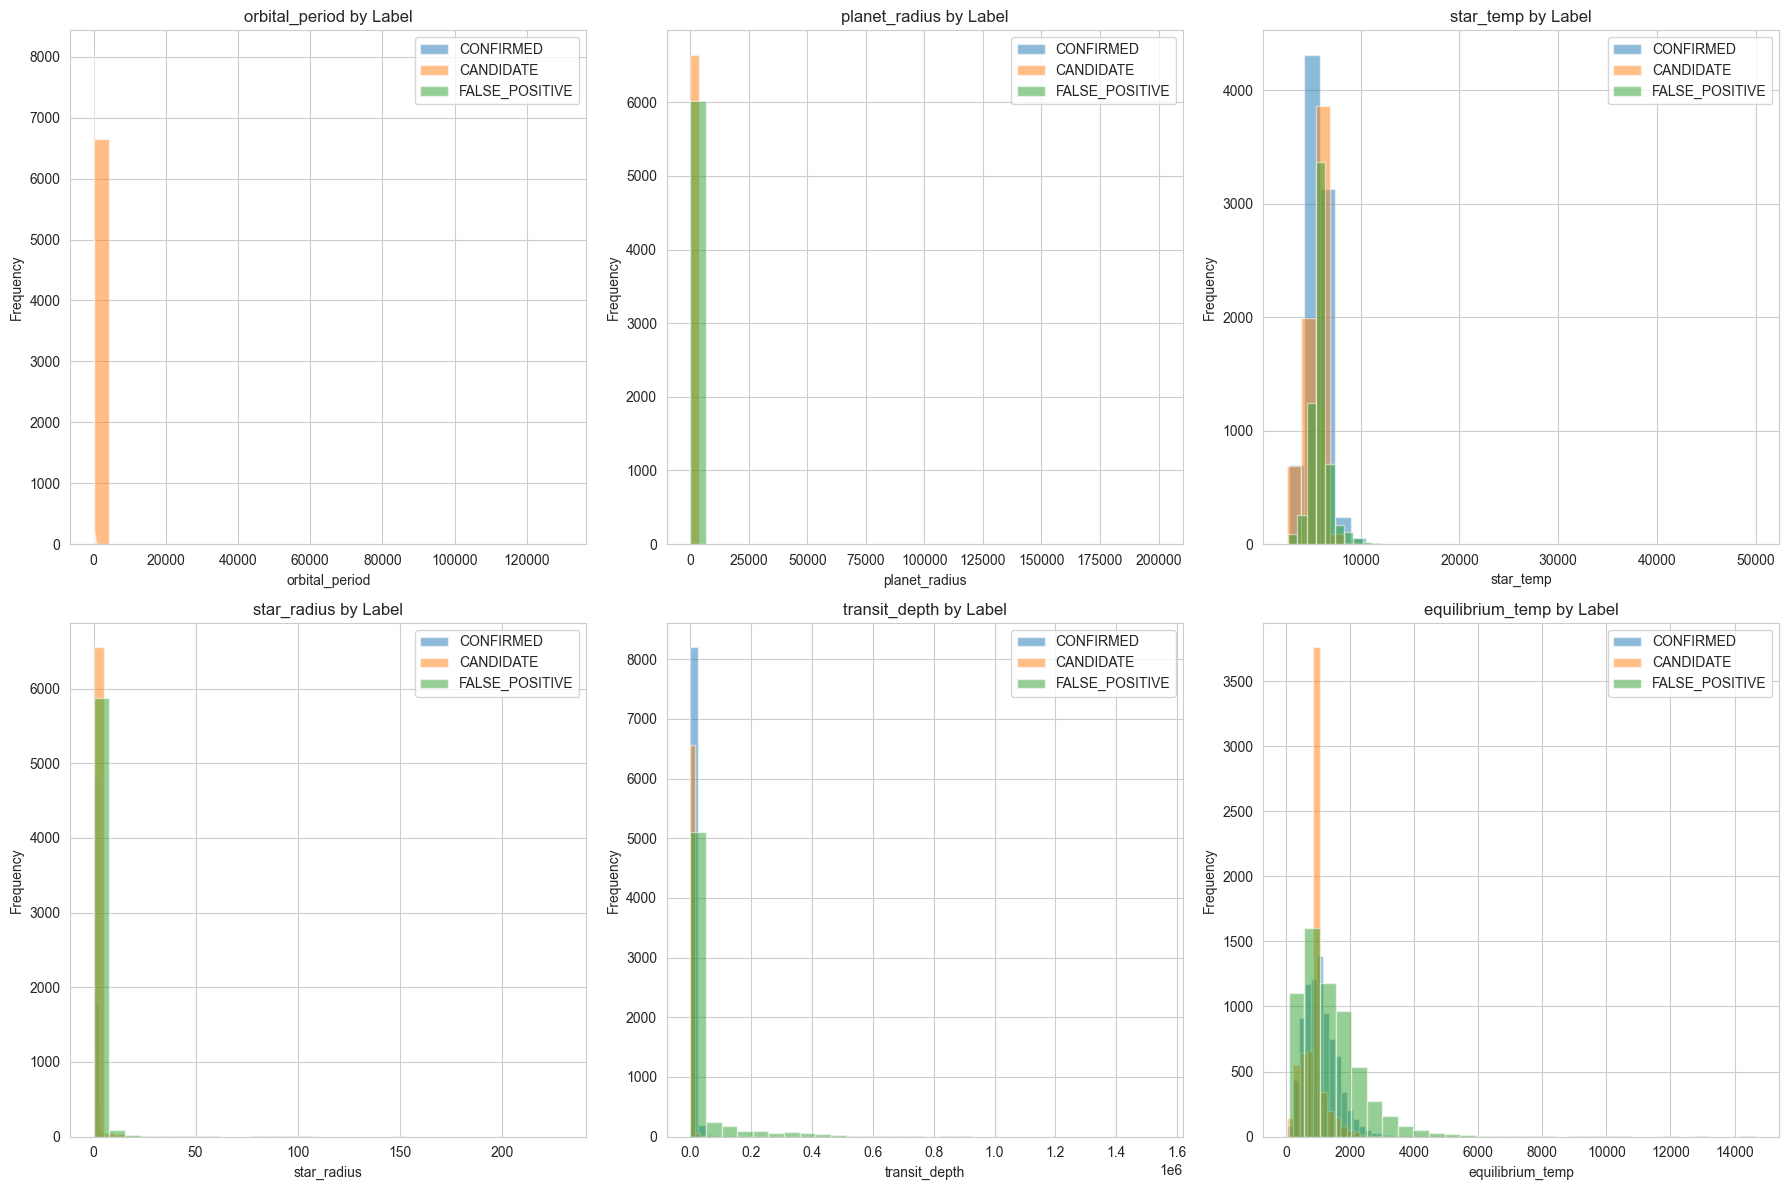

In [56]:
if len(available_viz) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for idx, feature in enumerate(available_viz[:6]):
        for label in df_engineered['label'].unique():
            subset = df_engineered[df_engineered['label'] == label]
            axes[idx].hist(subset[feature], bins=30, alpha=0.5, label=label)
        axes[idx].set_title(f'{feature} by Label')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

In [57]:
print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)



CORRELATION ANALYSIS


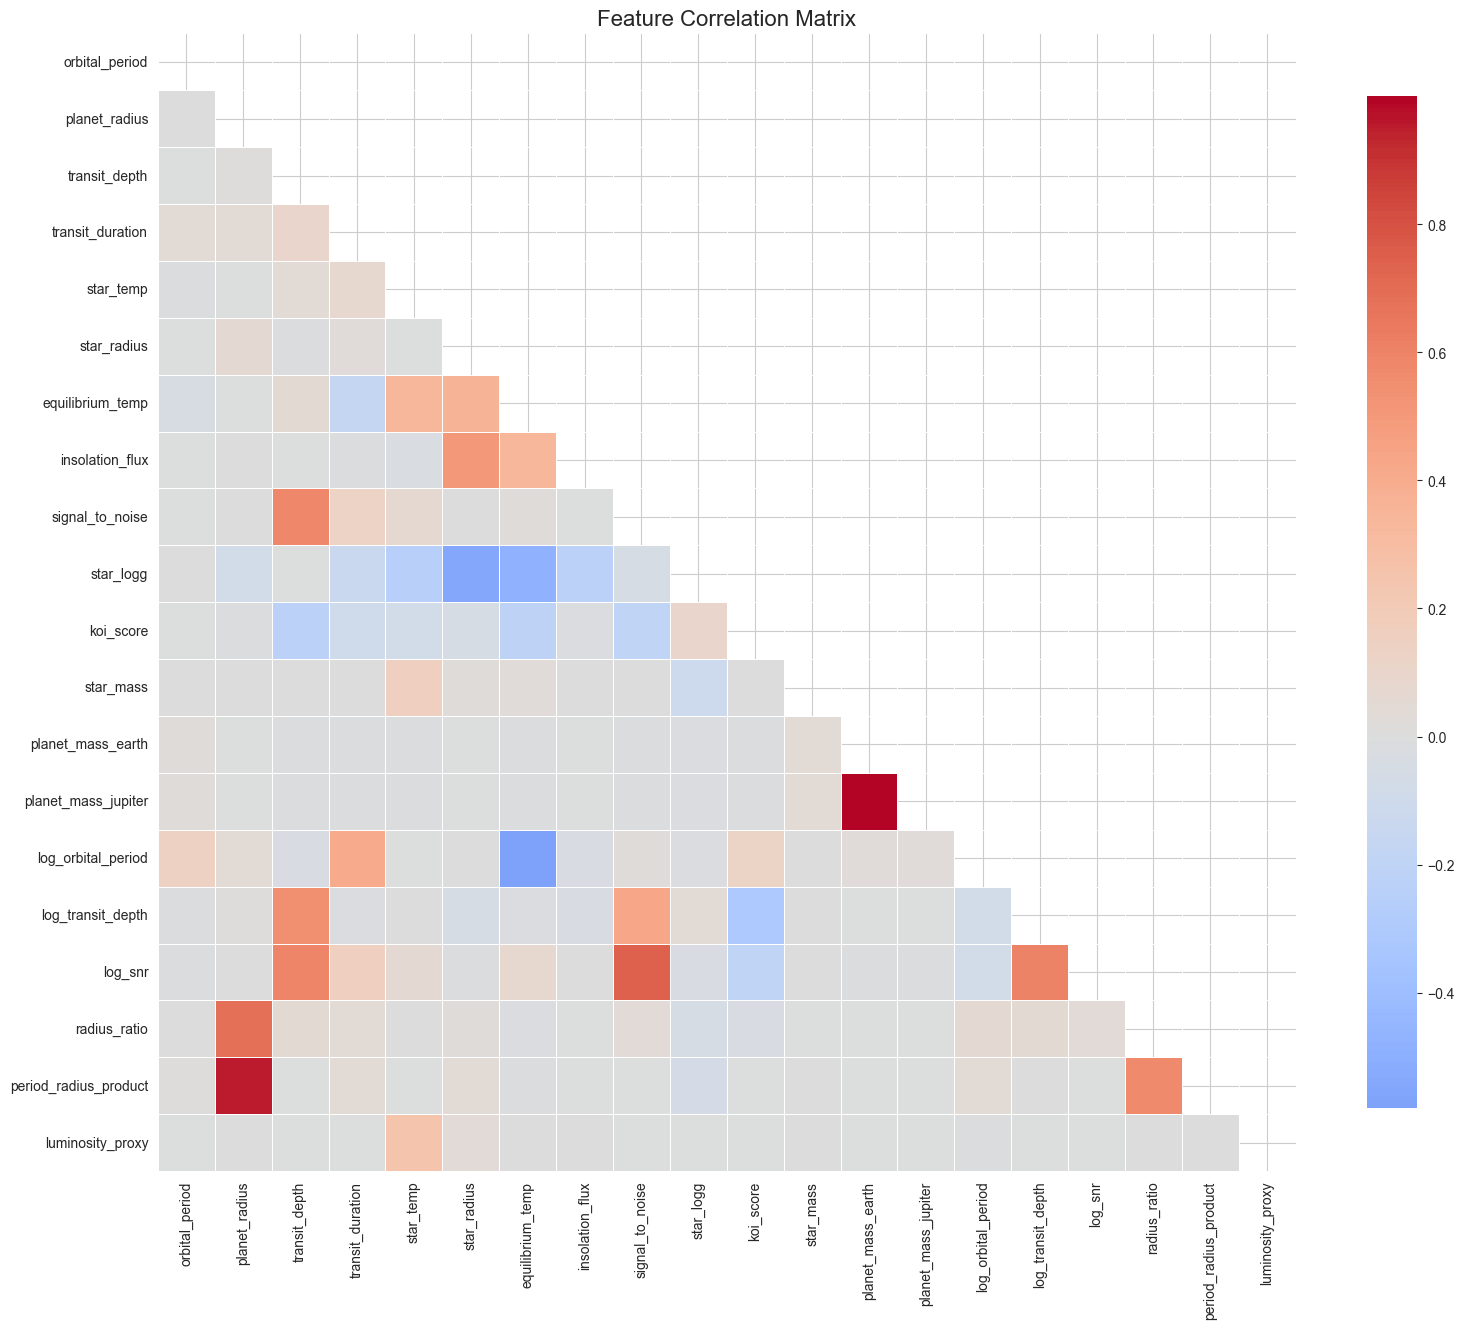

In [58]:
# Select numeric features only
numeric_features = df_engineered.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [f for f in numeric_features if f not in ['is_kepler', 'is_k2', 'is_tess']]

df_numeric = df_engineered[numeric_features].copy()

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [59]:
# Find highly correlated pairs
threshold = 0.85
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append({
                'feature1': correlation_matrix.columns[i],
                'feature2': correlation_matrix.columns[j],
                'correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print(f"\nHighly correlated pairs (|corr| > {threshold}):")
    for pair in high_corr_pairs:
        print(f"  {pair['feature1']} <-> {pair['feature2']}: {pair['correlation']:.3f}")
else:
    print(f"\nNo highly correlated pairs found (|corr| > {threshold})")



Highly correlated pairs (|corr| > 0.85):
  planet_radius <-> period_radius_product: 0.953
  planet_mass_earth <-> planet_mass_jupiter: 1.000


In [60]:
print("\n" + "=" * 80)
print("REMOVING HIGHLY CORRELATED FEATURES")
print("=" * 80)



REMOVING HIGHLY CORRELATED FEATURES


In [61]:
def remove_correlated_features(df, threshold=0.85):
    """Remove highly correlated features"""
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )

    to_drop = []
    for column in upper_tri.columns:
        if any(upper_tri[column] > threshold):
            # Find correlated features
            correlated = upper_tri[upper_tri[column] > threshold].index.tolist()
            # Drop the one with higher mean correlation
            mean_corr = corr_matrix[column].mean()
            for corr_col in correlated:
                if corr_matrix[corr_col].mean() > mean_corr and corr_col not in to_drop:
                    to_drop.append(corr_col)
                elif column not in to_drop:
                    to_drop.append(column)
                    break

    return list(set(to_drop))


features_to_drop = remove_correlated_features(df_numeric, threshold=0.85)

print(f"\nFeatures to drop due to high correlation: {features_to_drop}")



Features to drop due to high correlation: ['planet_mass_earth', 'planet_radius']


In [62]:
# Keep features for modeling
feature_columns = [col for col in df_numeric.columns if col not in features_to_drop]

print(f"\nFeatures remaining: {len(feature_columns)}")
print(feature_columns)


Features remaining: 18
['orbital_period', 'transit_depth', 'transit_duration', 'star_temp', 'star_radius', 'equilibrium_temp', 'insolation_flux', 'signal_to_noise', 'star_logg', 'koi_score', 'star_mass', 'planet_mass_jupiter', 'log_orbital_period', 'log_transit_depth', 'log_snr', 'radius_ratio', 'period_radius_product', 'luminosity_proxy']


In [63]:
print("\n" + "=" * 80)
print("PREPARING FINAL DATASET")
print("=" * 80)


PREPARING FINAL DATASET


In [64]:
# Create final feature matrix
X = df_engineered[feature_columns].copy()
y = df_engineered['label'].copy()

print(f"\nFinal X shape: {X.shape}")
print(f"Final y shape: {y.shape}")



Final X shape: (21126, 18)
Final y shape: (21126,)


In [65]:
print("\nClass distribution:")
print(y.value_counts())


Class distribution:
label
CONFIRMED         8445
CANDIDATE         6650
FALSE_POSITIVE    6031
Name: count, dtype: int64


In [66]:
print("\nClass percentages:")
print((y.value_counts() / len(y) * 100).round(2))



Class percentages:
label
CONFIRMED         39.97
CANDIDATE         31.48
FALSE_POSITIVE    28.55
Name: count, dtype: float64


In [67]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nLabel encoding mapping:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"  {label}: {idx}")



Label encoding mapping:
  CANDIDATE: 0
  CONFIRMED: 1
  FALSE_POSITIVE: 2


In [68]:
print("\n" + "=" * 80)
print("TRAIN-TEST SPLIT")
print("=" * 80)


TRAIN-TEST SPLIT


In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")



Training set: (16900, 18)
Test set: (4226, 18)


In [70]:
print("\nTrain set class distribution:")
print(pd.Series(y_train).value_counts())




Train set class distribution:
1    6756
0    5320
2    4824
Name: count, dtype: int64


In [71]:
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts())



Test set class distribution:
1    1689
0    1330
2    1207
Name: count, dtype: int64


In [72]:
print("\n" + "=" * 80)
print("FEATURE SCALING")
print("=" * 80)


FEATURE SCALING


In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print(f"Train scaled shape: {X_train_scaled.shape}")
print(f"Test scaled shape: {X_test_scaled.shape}")


Features scaled using StandardScaler
Train scaled shape: (16900, 18)
Test scaled shape: (4226, 18)


In [74]:
# Apply SMOTE if available
if HAVE_SMOTE:
    print("\nApplying SMOTE for class balancing...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
    print(f"After SMOTE: {X_train_resampled.shape}")
    print("Resampled class distribution:")
    print(pd.Series(y_train_resampled).value_counts())
else:
    X_train_resampled = X_train_scaled
    y_train_resampled = y_train
    print("\nSMOTE not available, using original training data")



Applying SMOTE for class balancing...
After SMOTE: (20268, 18)
Resampled class distribution:
0    6756
2    6756
1    6756
Name: count, dtype: int64


In [75]:
print("\n" + "=" * 80)
print("DEFINING MODELS")
print("=" * 80)



DEFINING MODELS


In [76]:
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    ),
    'SVM': SVC(
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=15,
        weights='distance',
        n_jobs=-1
    ),
    'Decision Tree': DecisionTreeClassifier(
        max_depth=15,
        class_weight='balanced',
        random_state=42
    ),
    'Extra Trees': ExtraTreesClassifier(
        n_estimators=200,
        max_depth=20,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
}

if HAVE_XGB:
    models['XGBoost'] = XGBClassifier(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        random_state=42,
        eval_metric='mlogloss',
        n_jobs=-1
    )

if HAVE_LGB:
    models['LightGBM'] = LGBMClassifier(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.05,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

In [77]:
print(f"\nTotal models to train: {len(models)}")
for model_name in models.keys():
    print(f"  - {model_name}")



Total models to train: 9
  - Logistic Regression
  - Random Forest
  - Gradient Boosting
  - SVM
  - KNN
  - Decision Tree
  - Extra Trees
  - XGBoost
  - LightGBM


In [78]:
print("\n" + "=" * 80)
print("TRAINING AND EVALUATING INDIVIDUAL MODELS")
print("=" * 80)


TRAINING AND EVALUATING INDIVIDUAL MODELS



MODEL: Logistic Regression

Training Logistic Regression...

TRAIN METRICS:
  Accuracy:  0.7715
  Precision: 0.7824
  Recall:    0.7715
  F1-Score:  0.7729

TEST METRICS:
  Accuracy:  0.7769
  Precision: 0.7903
  Recall:    0.7769
  F1-Score:  0.7782

CROSS-VALIDATION:
  Mean Accuracy: 0.7710 (+/- 0.0044)

CLASSIFICATION REPORT (Test Set):
                precision    recall  f1-score   support

     CANDIDATE       0.68      0.85      0.76      1330
     CONFIRMED       0.82      0.75      0.78      1689
FALSE_POSITIVE       0.87      0.73      0.80      1207

      accuracy                           0.78      4226
     macro avg       0.79      0.78      0.78      4226
  weighted avg       0.79      0.78      0.78      4226



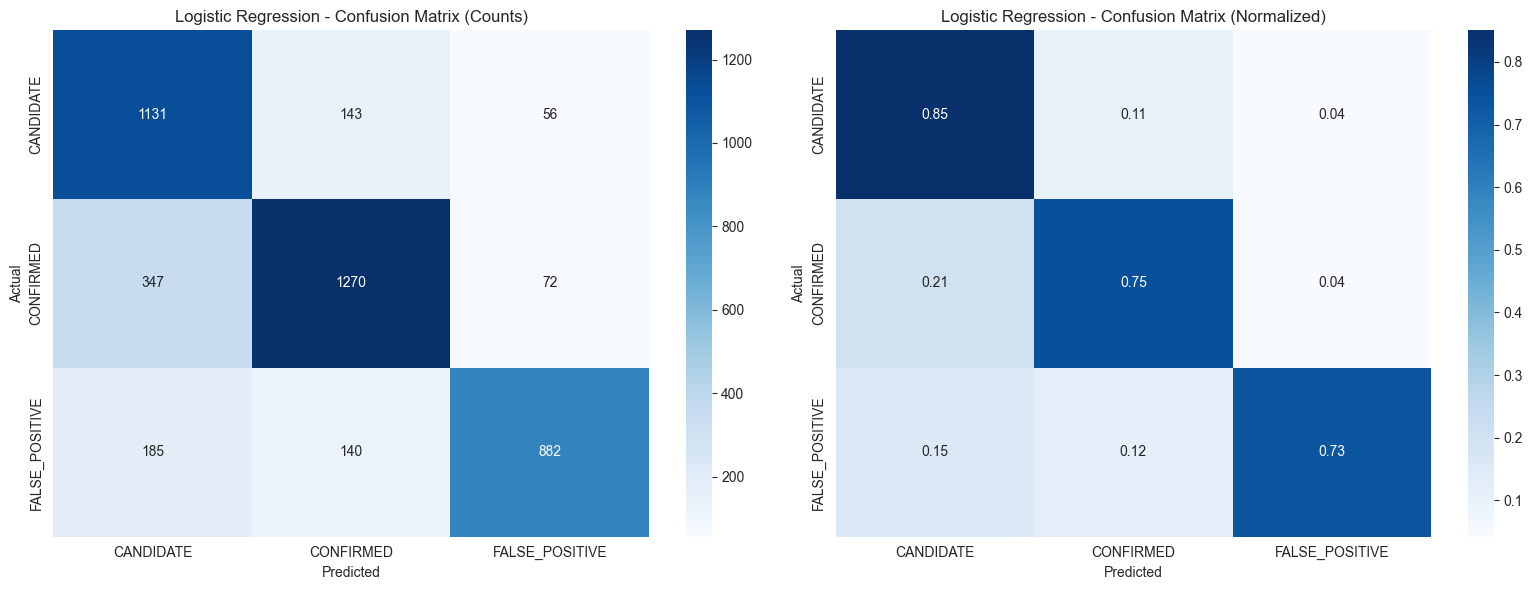

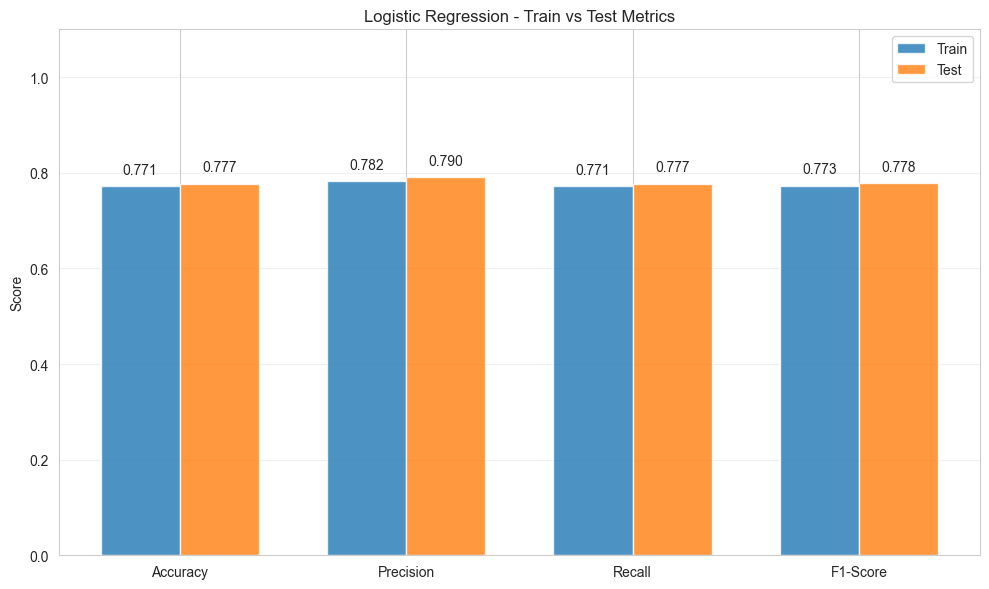


Logistic Regression training completed successfully!

MODEL: Random Forest

Training Random Forest...

TRAIN METRICS:
  Accuracy:  0.9807
  Precision: 0.9816
  Recall:    0.9807
  F1-Score:  0.9808

TEST METRICS:
  Accuracy:  0.8422
  Precision: 0.8440
  Recall:    0.8422
  F1-Score:  0.8416

CROSS-VALIDATION:
  Mean Accuracy: 0.8426 (+/- 0.0078)

CLASSIFICATION REPORT (Test Set):
                precision    recall  f1-score   support

     CANDIDATE       0.88      0.80      0.84      1330
     CONFIRMED       0.82      0.90      0.86      1689
FALSE_POSITIVE       0.84      0.81      0.82      1207

      accuracy                           0.84      4226
     macro avg       0.85      0.84      0.84      4226
  weighted avg       0.84      0.84      0.84      4226



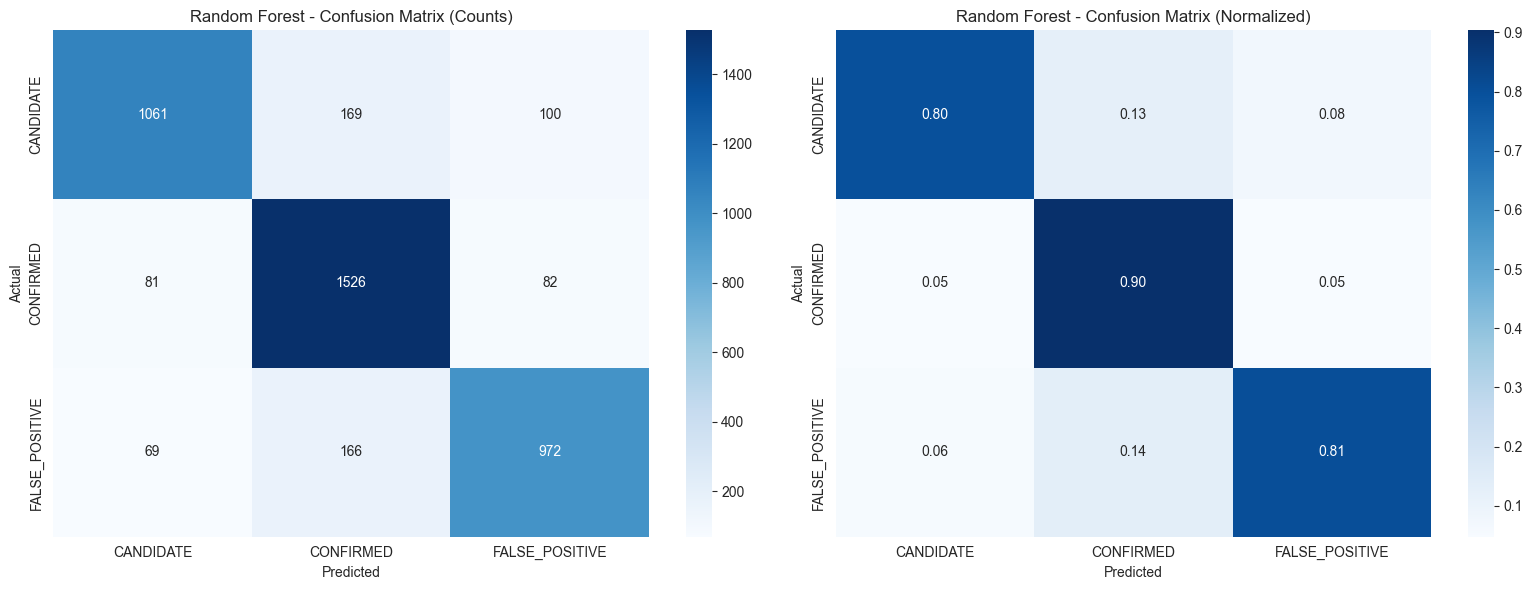

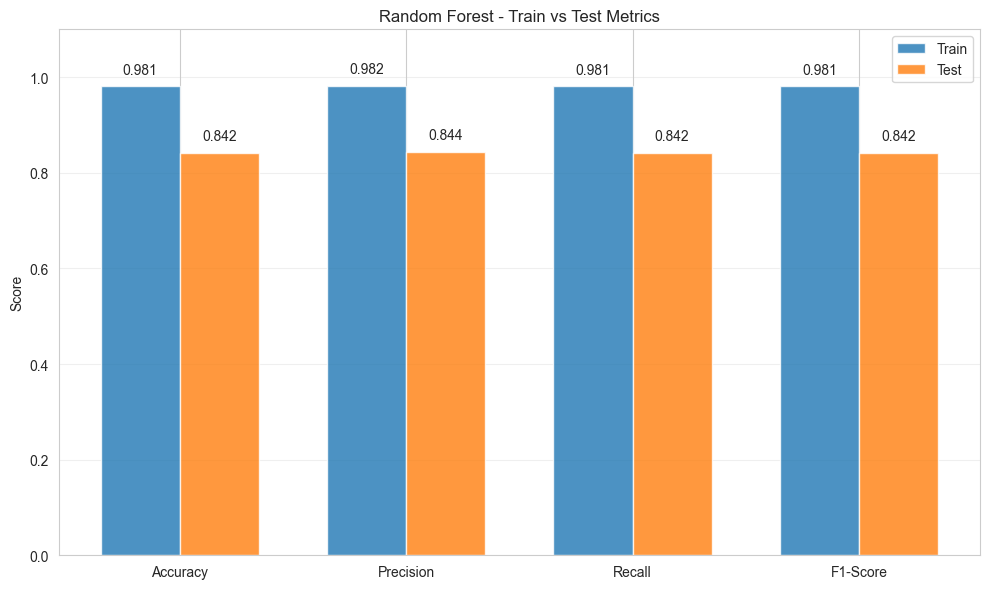

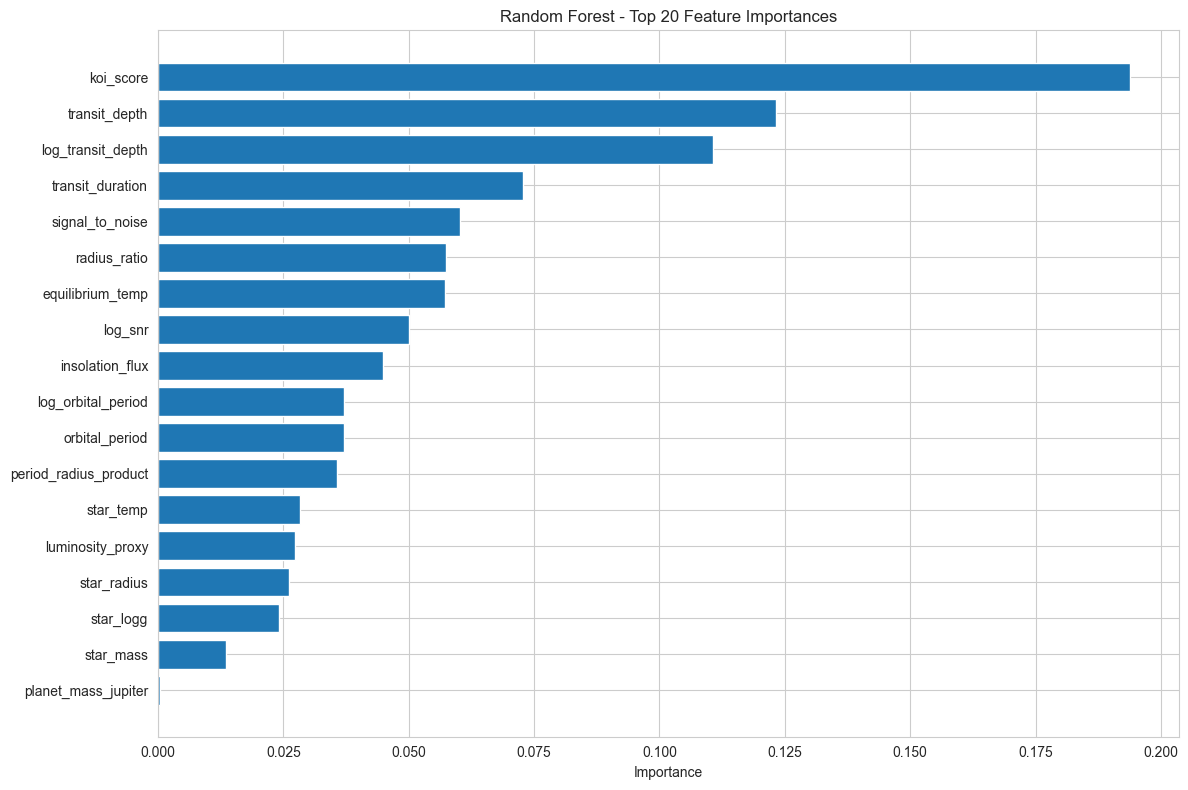


Random Forest training completed successfully!

MODEL: Gradient Boosting

Training Gradient Boosting...

TRAIN METRICS:
  Accuracy:  0.9529
  Precision: 0.9552
  Recall:    0.9529
  F1-Score:  0.9530

TEST METRICS:
  Accuracy:  0.8410
  Precision: 0.8428
  Recall:    0.8410
  F1-Score:  0.8405

CROSS-VALIDATION:
  Mean Accuracy: 0.8419 (+/- 0.0054)

CLASSIFICATION REPORT (Test Set):
                precision    recall  f1-score   support

     CANDIDATE       0.87      0.80      0.83      1330
     CONFIRMED       0.82      0.90      0.86      1689
FALSE_POSITIVE       0.84      0.81      0.82      1207

      accuracy                           0.84      4226
     macro avg       0.84      0.83      0.84      4226
  weighted avg       0.84      0.84      0.84      4226



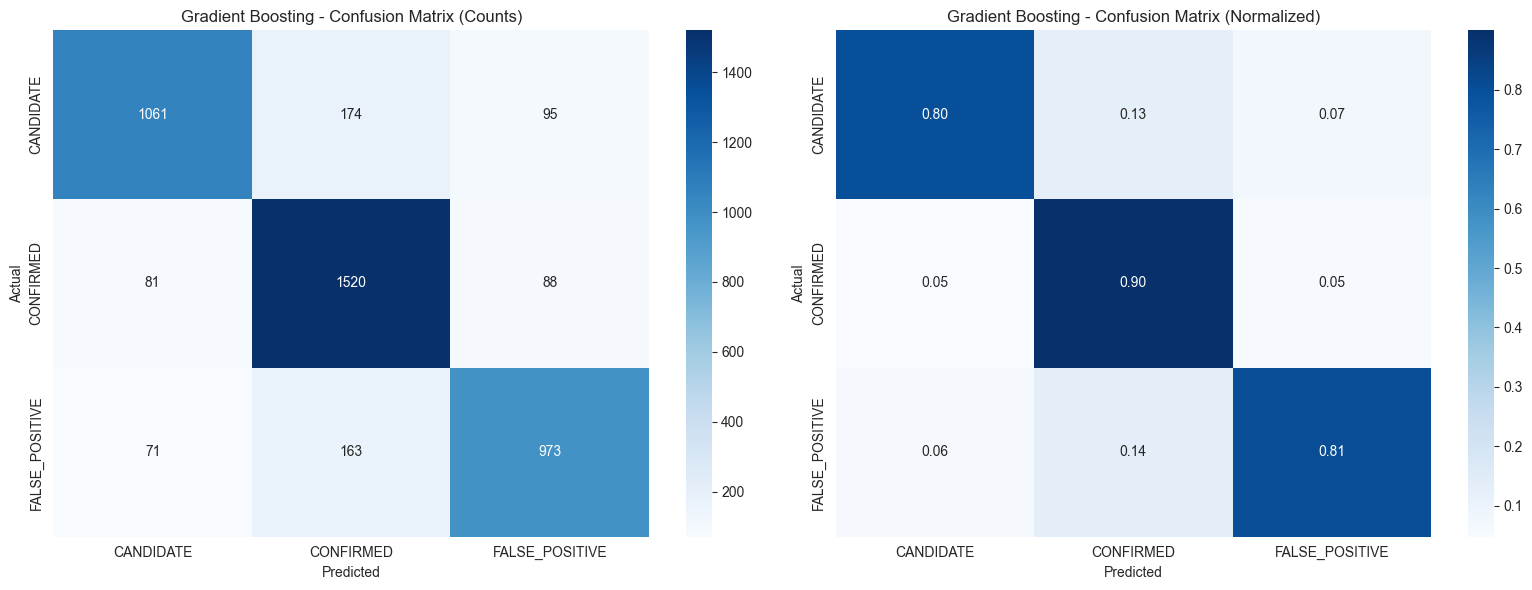

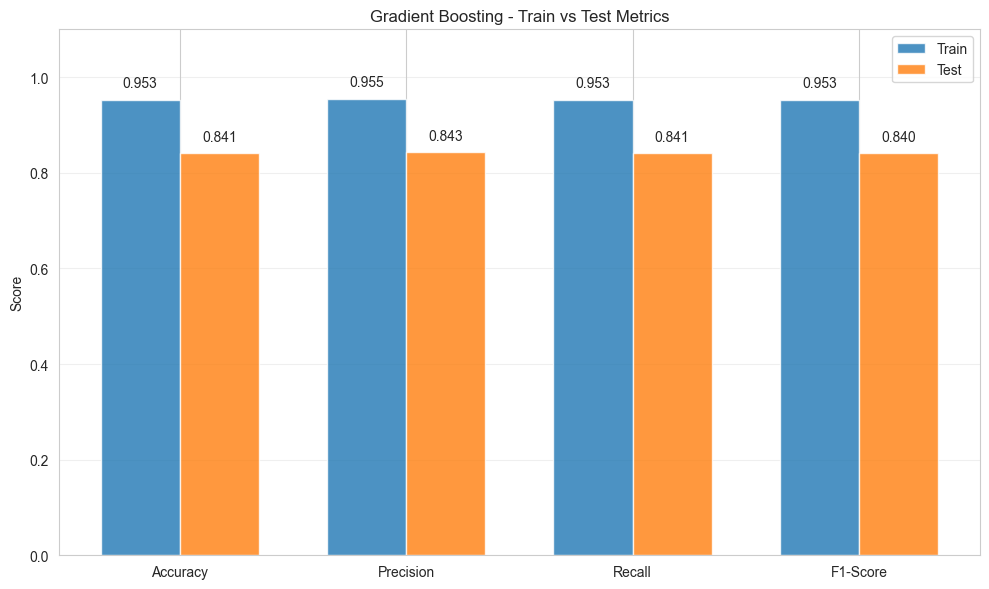

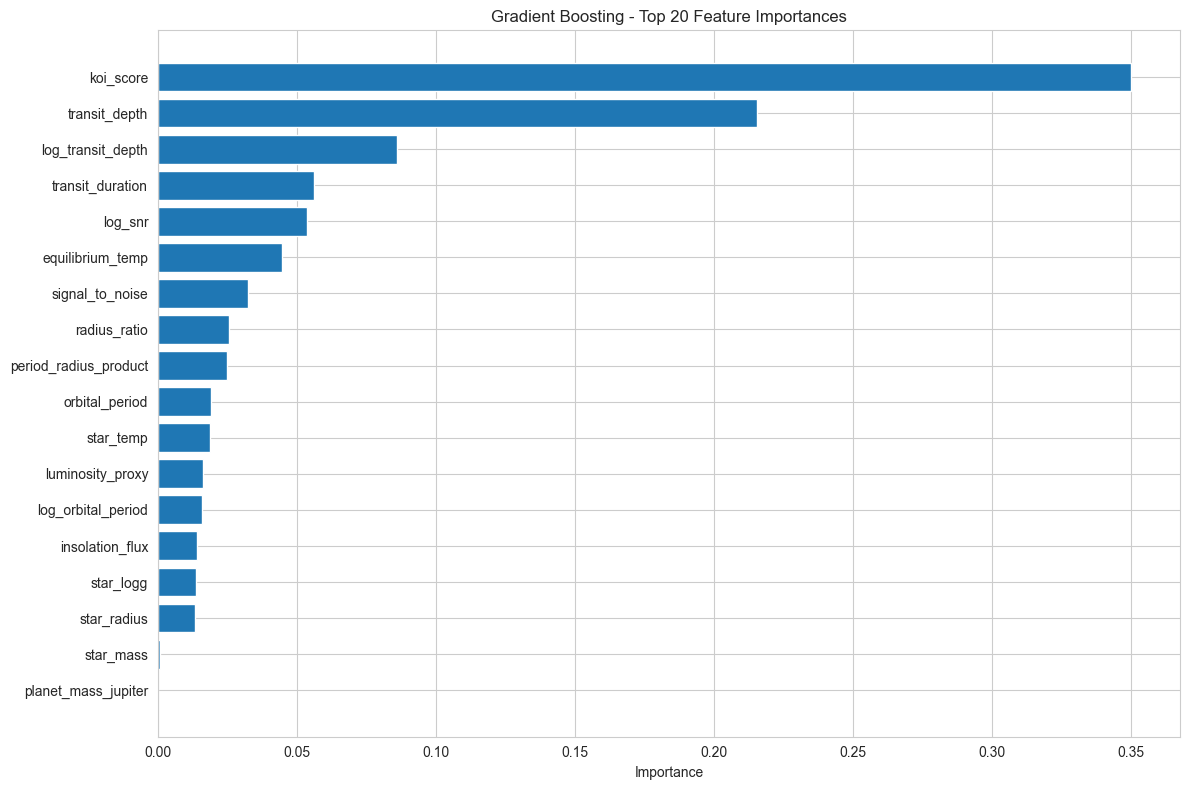


Gradient Boosting training completed successfully!

MODEL: SVM

Training SVM...

TRAIN METRICS:
  Accuracy:  0.7934
  Precision: 0.7996
  Recall:    0.7934
  F1-Score:  0.7944

TEST METRICS:
  Accuracy:  0.7908
  Precision: 0.7990
  Recall:    0.7908
  F1-Score:  0.7920

CROSS-VALIDATION:
  Mean Accuracy: 0.7886 (+/- 0.0031)

CLASSIFICATION REPORT (Test Set):
                precision    recall  f1-score   support

     CANDIDATE       0.71      0.83      0.76      1330
     CONFIRMED       0.81      0.78      0.80      1689
FALSE_POSITIVE       0.88      0.76      0.82      1207

      accuracy                           0.79      4226
     macro avg       0.80      0.79      0.79      4226
  weighted avg       0.80      0.79      0.79      4226



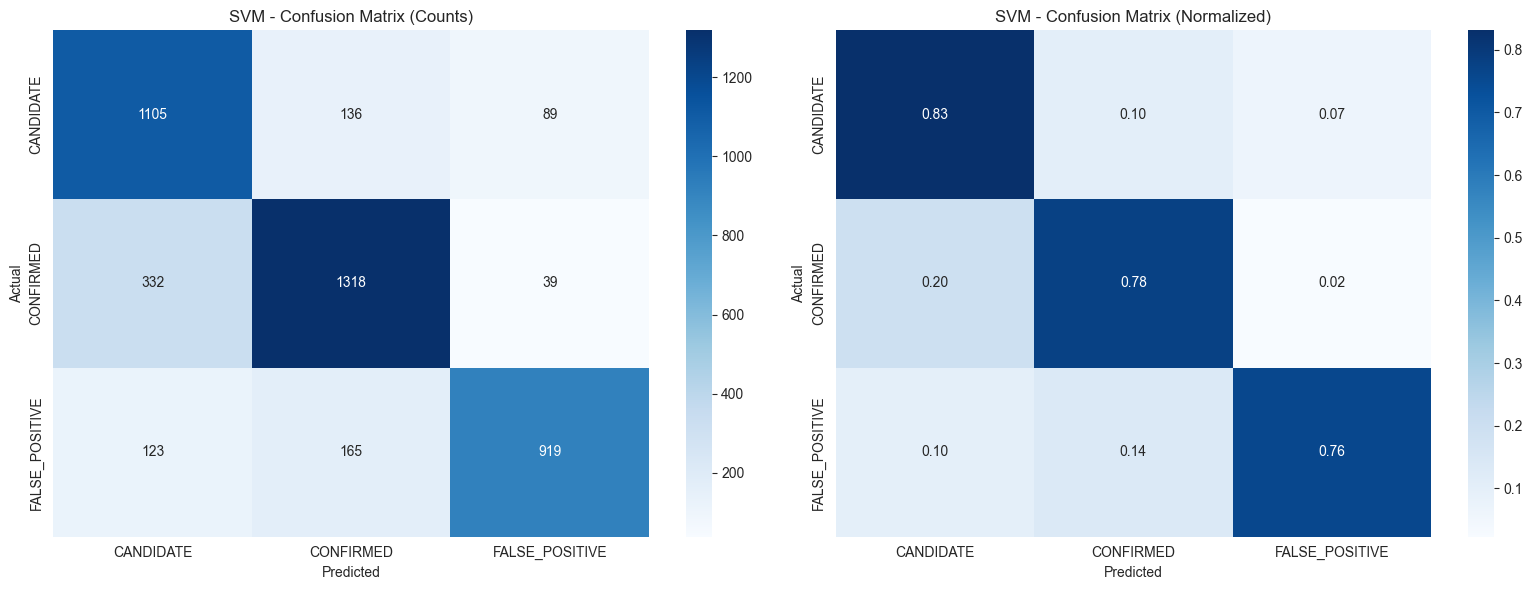

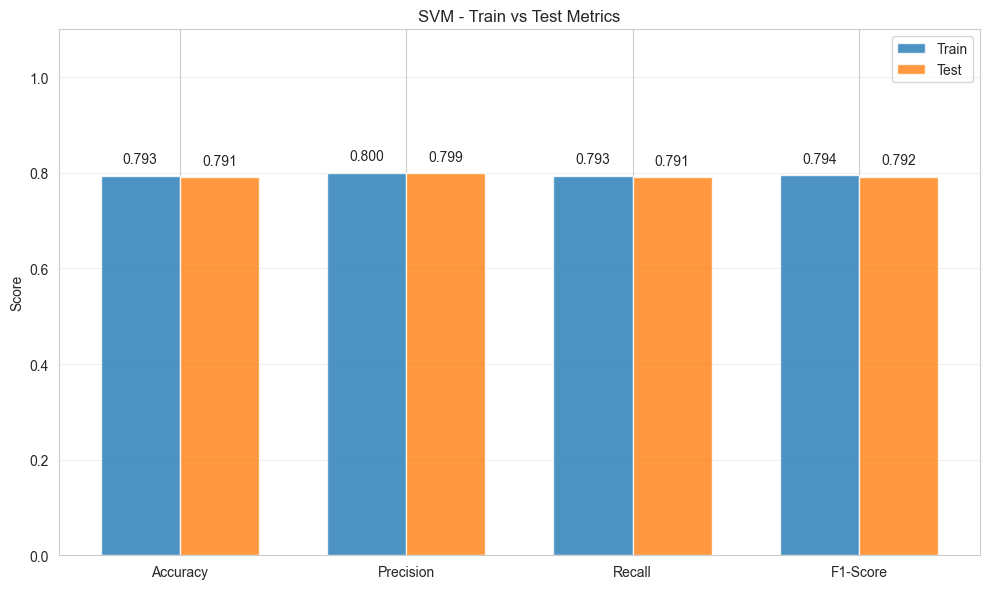


SVM training completed successfully!

MODEL: KNN

Training KNN...

TRAIN METRICS:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

TEST METRICS:
  Accuracy:  0.8289
  Precision: 0.8297
  Recall:    0.8289
  F1-Score:  0.8285

CROSS-VALIDATION:
  Mean Accuracy: 0.8162 (+/- 0.0057)

CLASSIFICATION REPORT (Test Set):
                precision    recall  f1-score   support

     CANDIDATE       0.82      0.80      0.81      1330
     CONFIRMED       0.82      0.88      0.85      1689
FALSE_POSITIVE       0.85      0.80      0.82      1207

      accuracy                           0.83      4226
     macro avg       0.83      0.82      0.83      4226
  weighted avg       0.83      0.83      0.83      4226



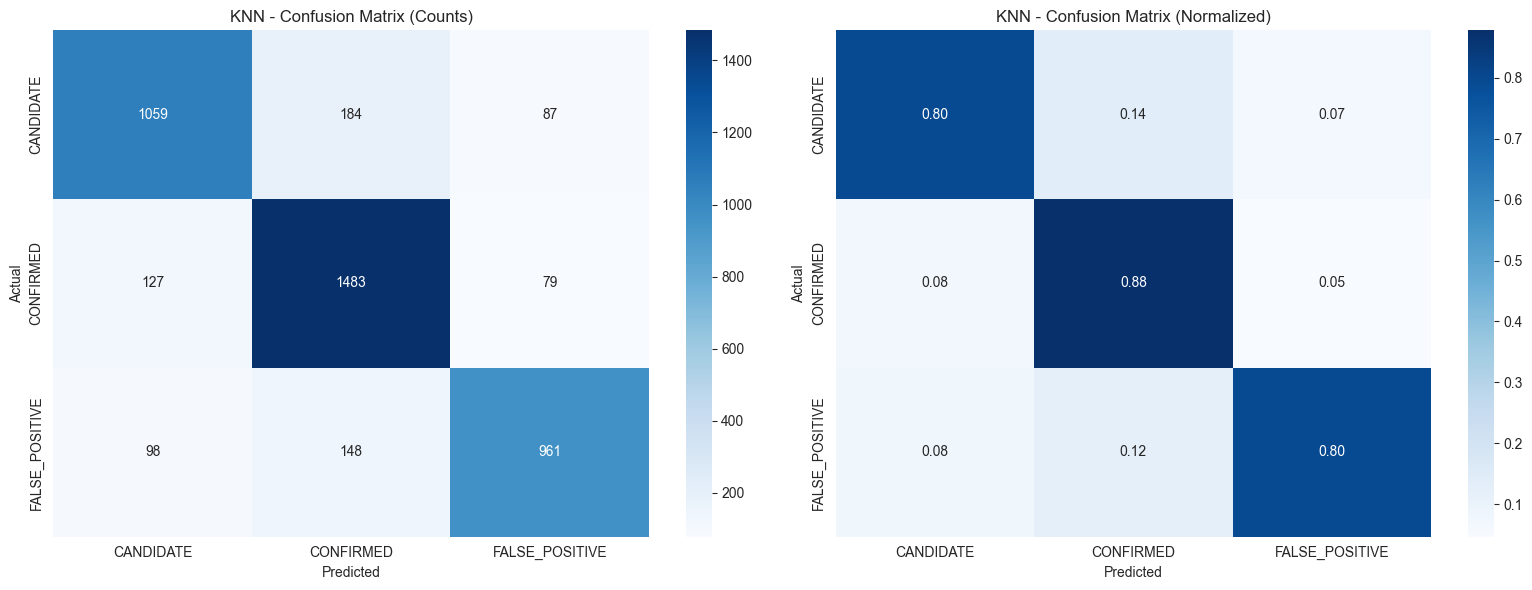

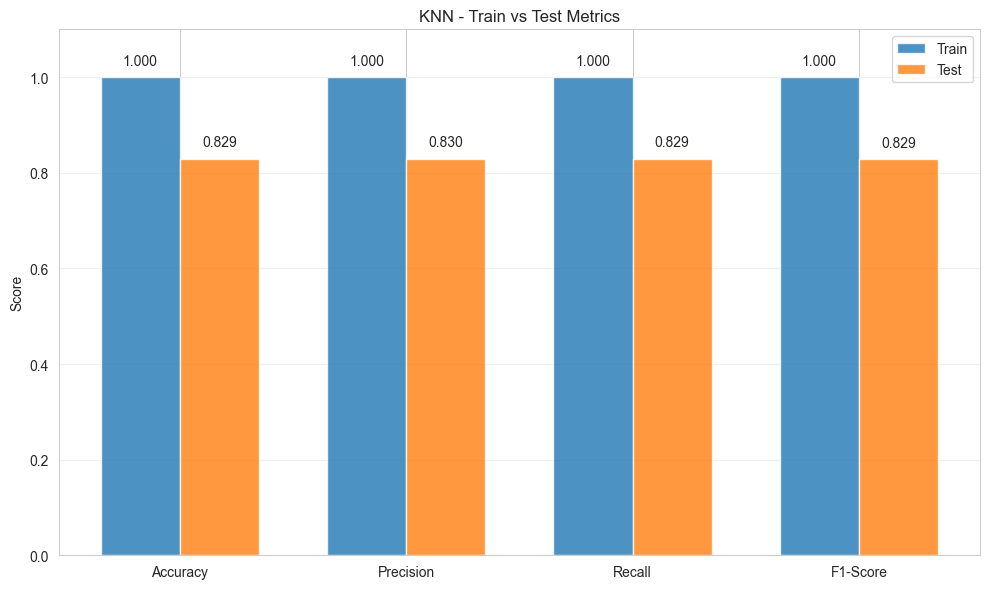


KNN training completed successfully!

MODEL: Decision Tree

Training Decision Tree...

TRAIN METRICS:
  Accuracy:  0.9385
  Precision: 0.9401
  Recall:    0.9385
  F1-Score:  0.9385

TEST METRICS:
  Accuracy:  0.8171
  Precision: 0.8173
  Recall:    0.8171
  F1-Score:  0.8166

CROSS-VALIDATION:
  Mean Accuracy: 0.8042 (+/- 0.0054)

CLASSIFICATION REPORT (Test Set):
                precision    recall  f1-score   support

     CANDIDATE       0.82      0.80      0.81      1330
     CONFIRMED       0.81      0.86      0.84      1689
FALSE_POSITIVE       0.82      0.77      0.79      1207

      accuracy                           0.82      4226
     macro avg       0.82      0.81      0.81      4226
  weighted avg       0.82      0.82      0.82      4226



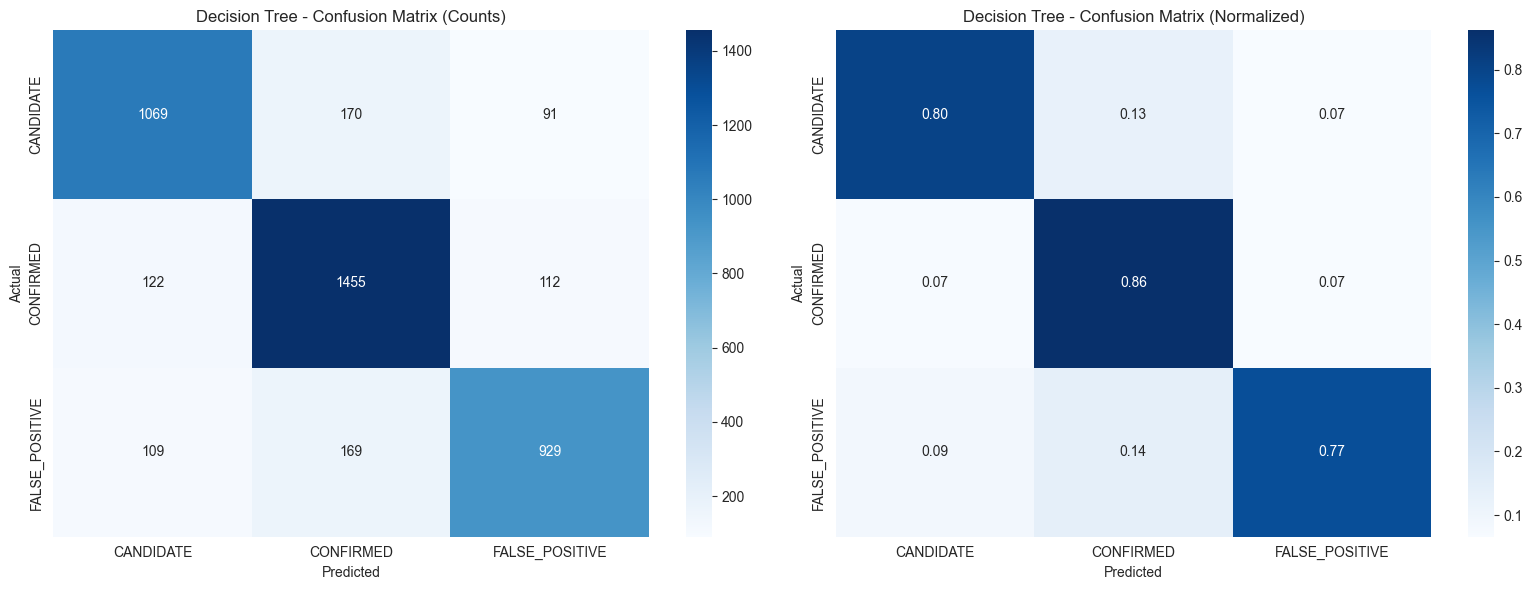

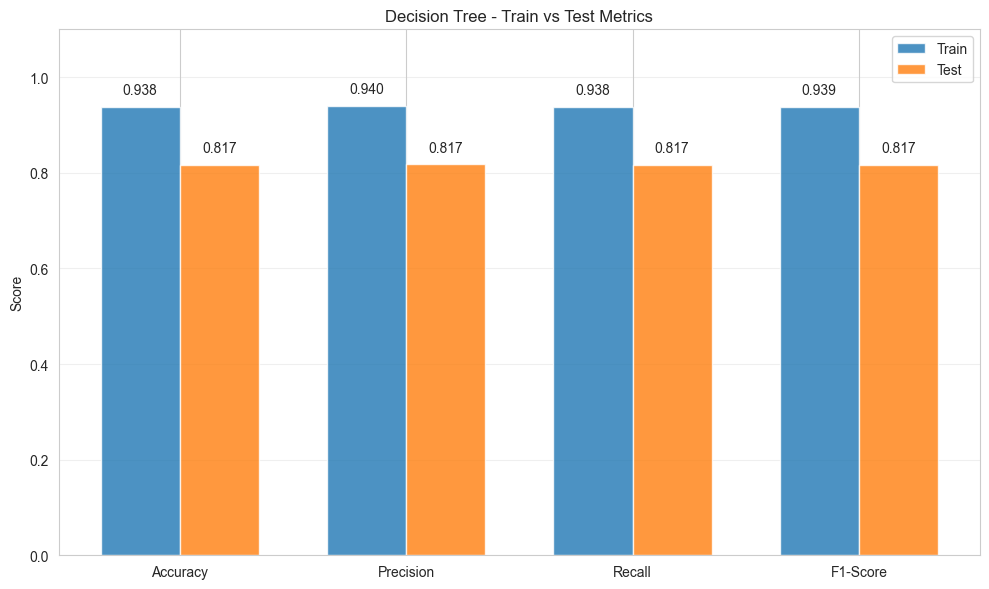

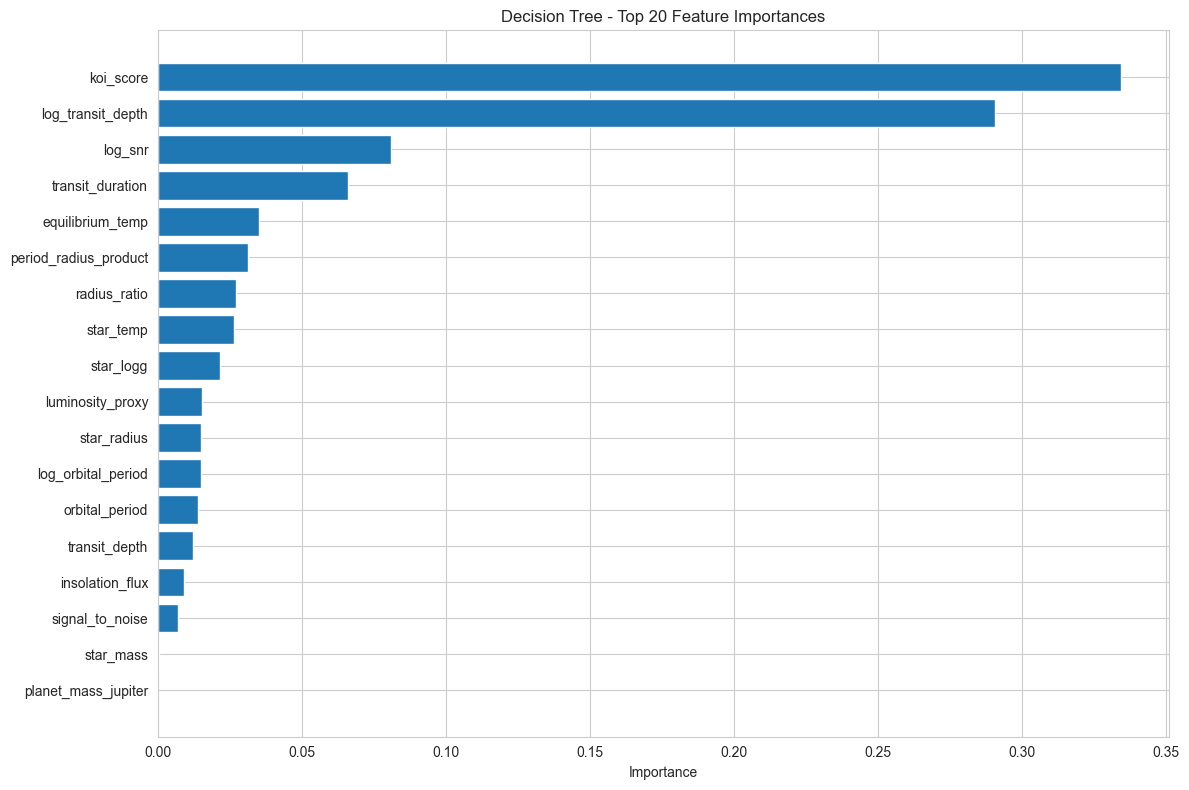


Decision Tree training completed successfully!

MODEL: Extra Trees

Training Extra Trees...

TRAIN METRICS:
  Accuracy:  0.9188
  Precision: 0.9231
  Recall:    0.9188
  F1-Score:  0.9187

TEST METRICS:
  Accuracy:  0.8310
  Precision: 0.8330
  Recall:    0.8310
  F1-Score:  0.8303

CROSS-VALIDATION:
  Mean Accuracy: 0.8337 (+/- 0.0051)

CLASSIFICATION REPORT (Test Set):
                precision    recall  f1-score   support

     CANDIDATE       0.83      0.80      0.82      1330
     CONFIRMED       0.81      0.90      0.85      1689
FALSE_POSITIVE       0.87      0.77      0.82      1207

      accuracy                           0.83      4226
     macro avg       0.84      0.82      0.83      4226
  weighted avg       0.83      0.83      0.83      4226



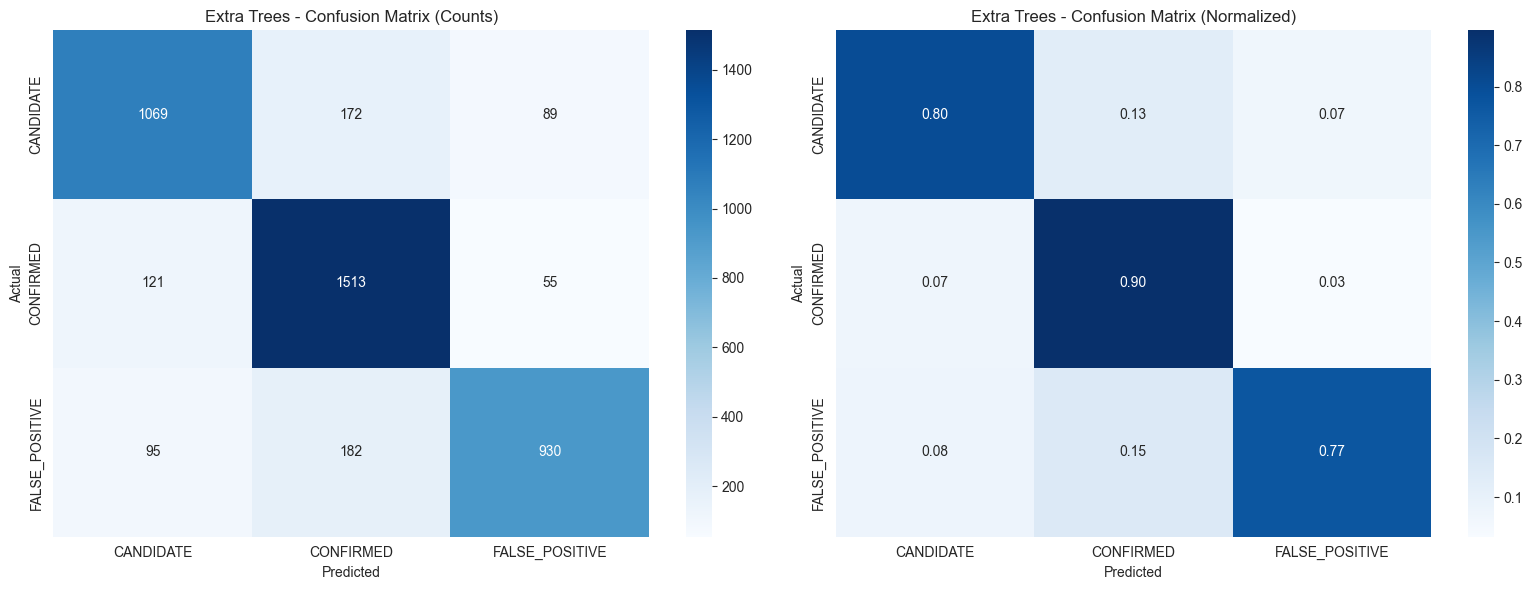

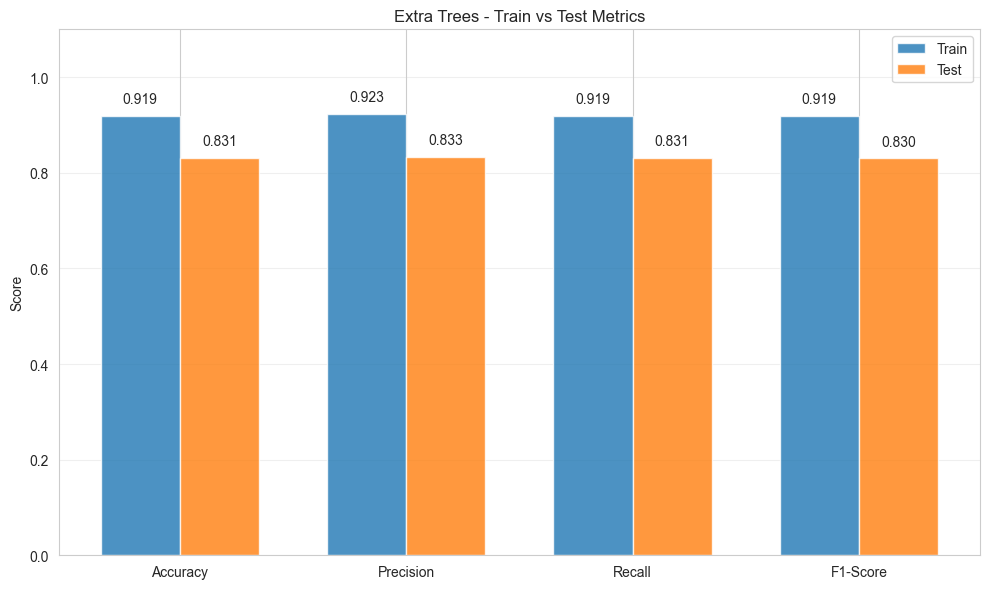

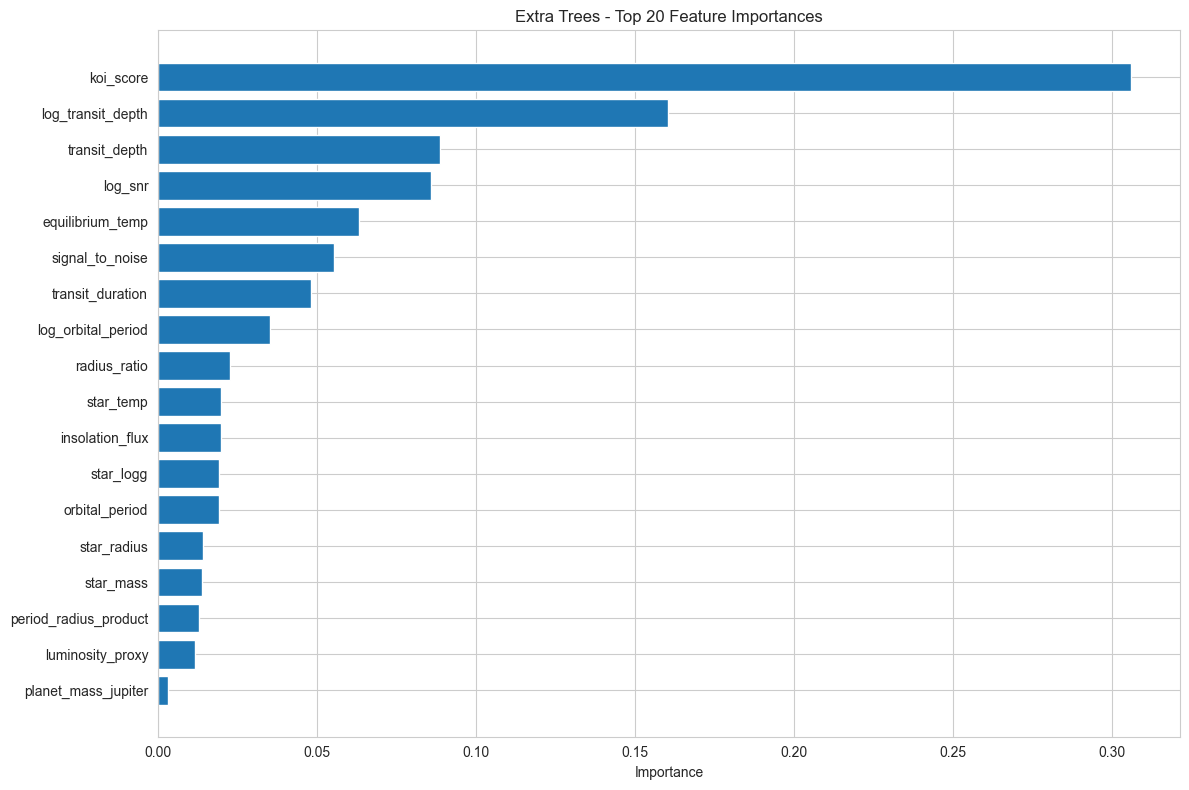


Extra Trees training completed successfully!

MODEL: XGBoost

Training XGBoost...

TRAIN METRICS:
  Accuracy:  0.9700
  Precision: 0.9712
  Recall:    0.9700
  F1-Score:  0.9700

TEST METRICS:
  Accuracy:  0.8443
  Precision: 0.8459
  Recall:    0.8443
  F1-Score:  0.8439

CROSS-VALIDATION:
  Mean Accuracy: 0.8427 (+/- 0.0064)

CLASSIFICATION REPORT (Test Set):
                precision    recall  f1-score   support

     CANDIDATE       0.88      0.81      0.84      1330
     CONFIRMED       0.82      0.89      0.86      1689
FALSE_POSITIVE       0.85      0.82      0.83      1207

      accuracy                           0.84      4226
     macro avg       0.85      0.84      0.84      4226
  weighted avg       0.85      0.84      0.84      4226



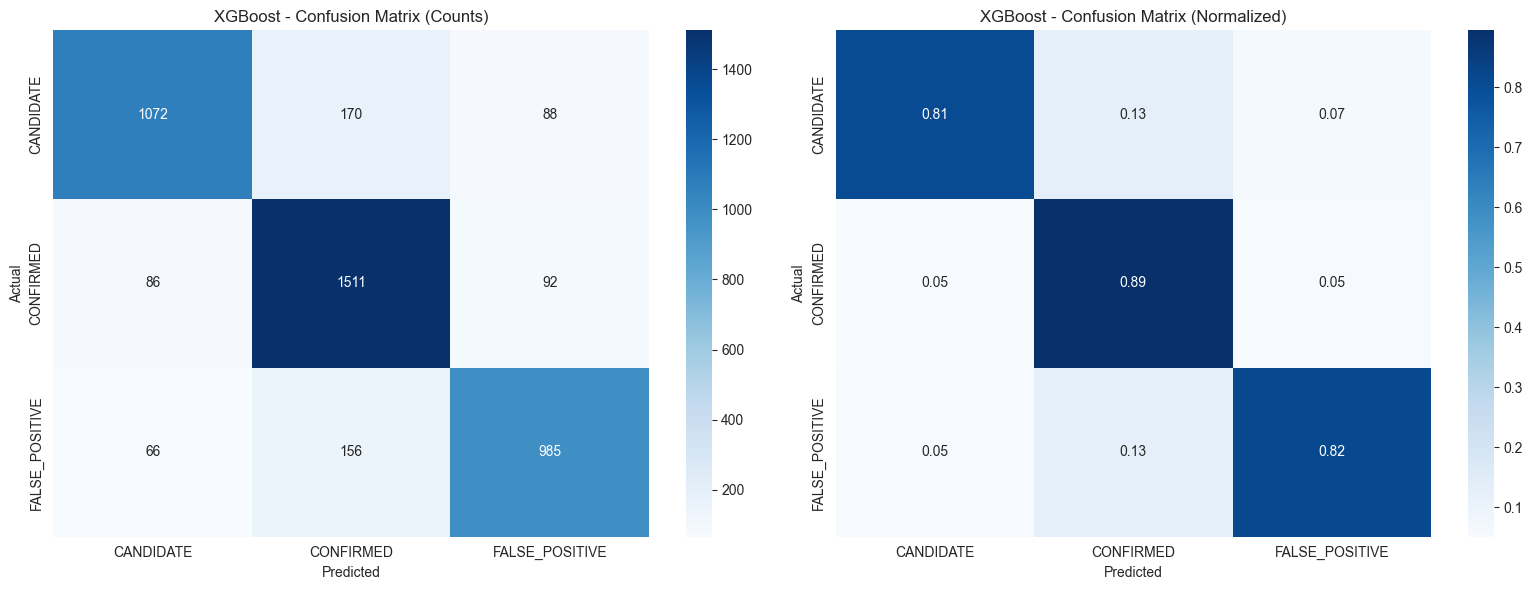

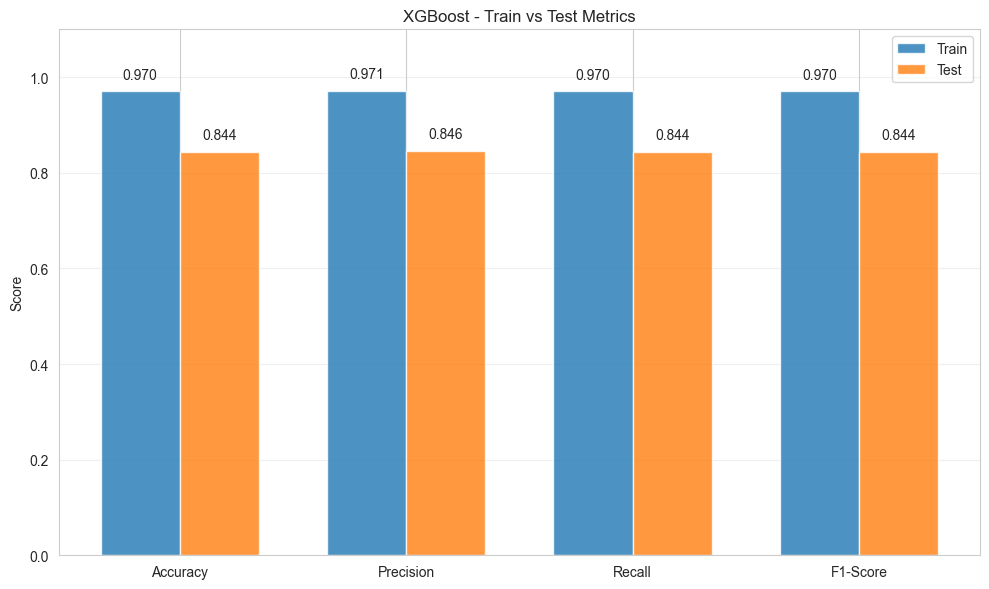

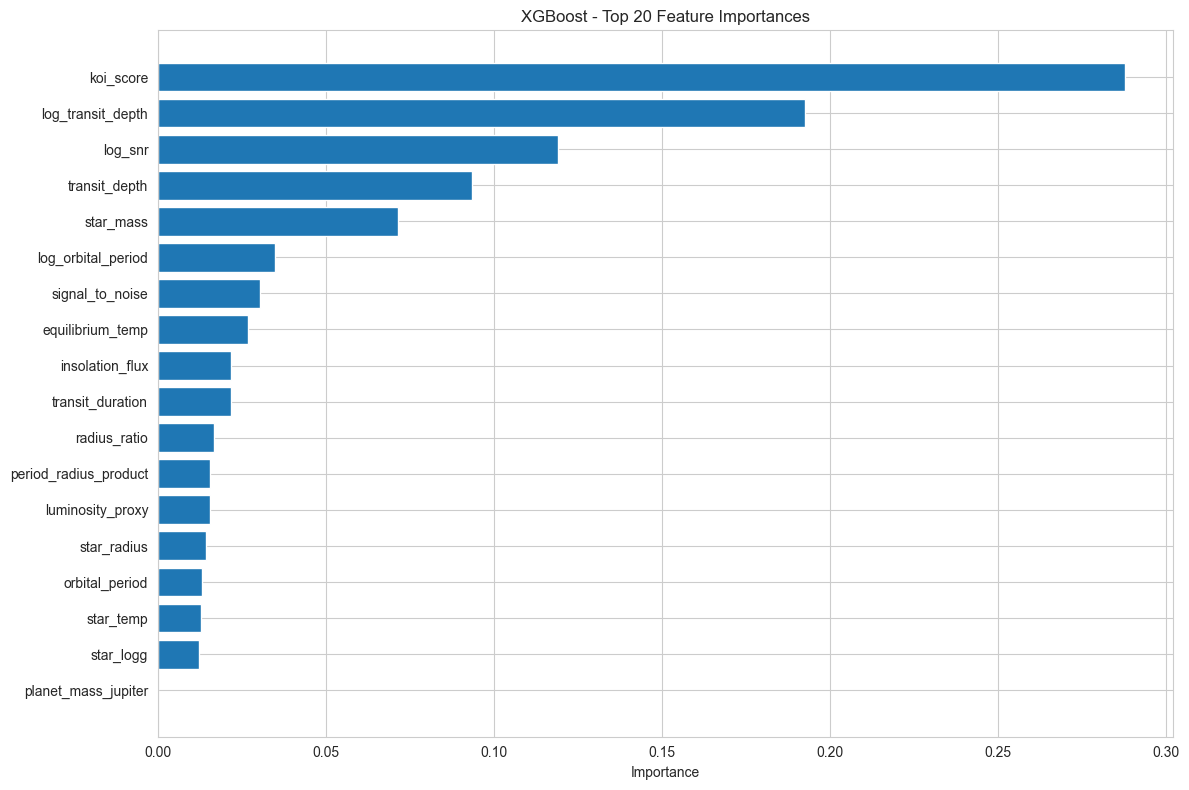


XGBoost training completed successfully!

MODEL: LightGBM

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4481
[LightGBM] [Info] Number of data points in the train set: 20268, number of used features: 18
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612

TRAIN METRICS:
  Accuracy:  0.9098
  Precision: 0.9134
  Recall:    0.9098
  F1-Score:  0.9096

TEST METRICS:
  Accuracy:  0.8483
  Precision: 0.8508
  Recall:    0.8483
  F1-Score:  0.8479

CROSS-VALIDATION:
  Mean Accuracy: 0.8437 (+/- 0.0058)

CLASSIFICATION REPORT (Test Set):
                precision    recall  f1-score   support

     CANDIDATE       0.89      0.80      0.84      1330
     CONF

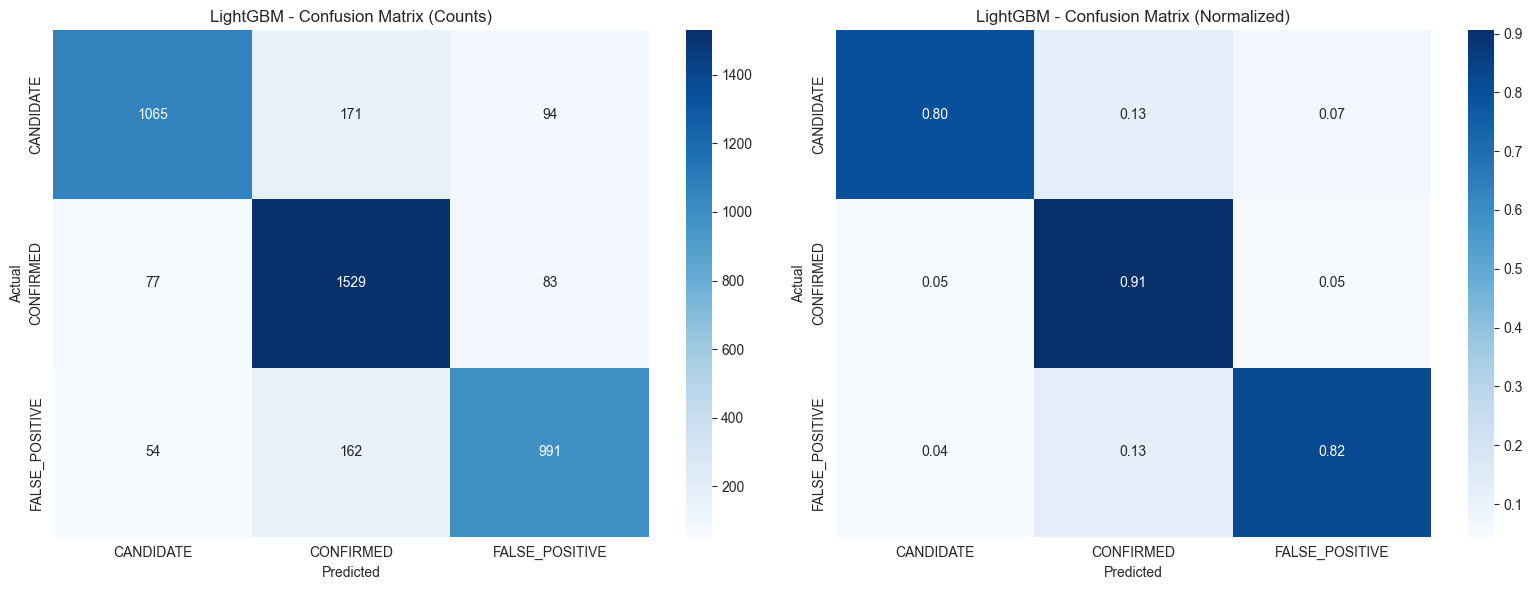

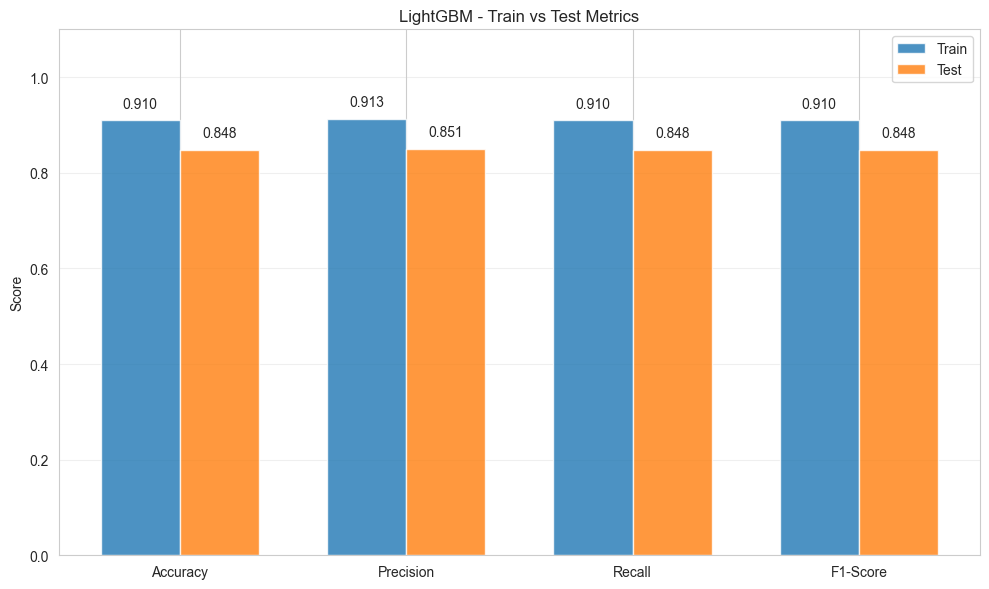

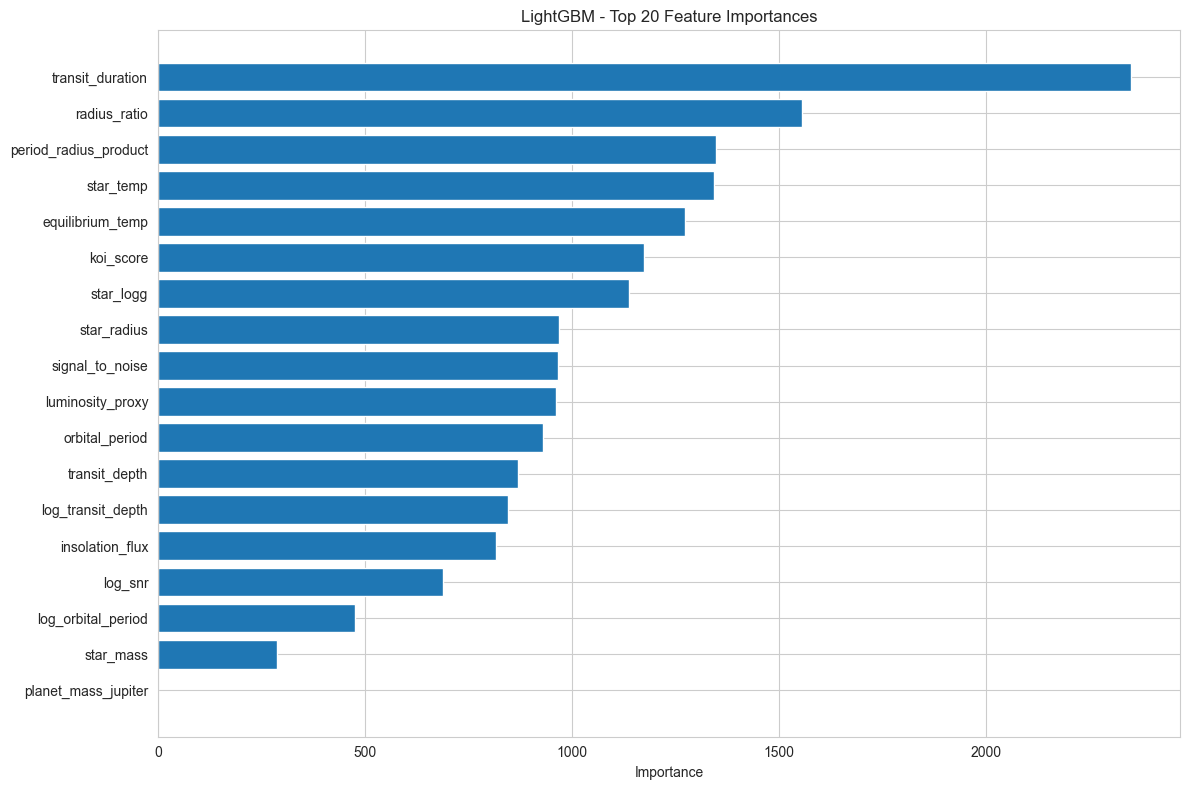


LightGBM training completed successfully!


In [79]:
model_results = {}

for model_name, model in models.items():
    print("\n" + "=" * 80)
    print(f"MODEL: {model_name}")
    print("=" * 80)

    try:
        # Train model
        print(f"\nTraining {model_name}...")
        model.fit(X_train_resampled, y_train_resampled)

        # Predictions
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        # Probabilities
        if hasattr(model, 'predict_proba'):
            y_train_proba = model.predict_proba(X_train_scaled)
            y_test_proba = model.predict_proba(X_test_scaled)
        else:
            y_train_proba = None
            y_test_proba = None

        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_precision = precision_score(y_train, y_train_pred, average='weighted')
        test_precision = precision_score(y_test, y_test_pred, average='weighted')

        train_recall = recall_score(y_train, y_train_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')

        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        # Cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv,
                                    scoring='accuracy', n_jobs=-1)

        # Store results
        model_results[model_name] = {
            'model': model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'train_precision': train_precision,
            'test_precision': test_precision,
            'train_recall': train_recall,
            'test_recall': test_recall,
            'train_f1': train_f1,
            'test_f1': test_f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'y_test_pred': y_test_pred,
            'y_test_proba': y_test_proba,
            'confusion_matrix': confusion_matrix(y_test, y_test_pred)
        }

        # Print results
        print(f"\nTRAIN METRICS:")
        print(f"  Accuracy:  {train_accuracy:.4f}")
        print(f"  Precision: {train_precision:.4f}")
        print(f"  Recall:    {train_recall:.4f}")
        print(f"  F1-Score:  {train_f1:.4f}")

        print(f"\nTEST METRICS:")
        print(f"  Accuracy:  {test_accuracy:.4f}")
        print(f"  Precision: {test_precision:.4f}")
        print(f"  Recall:    {test_recall:.4f}")
        print(f"  F1-Score:  {test_f1:.4f}")

        print(f"\nCROSS-VALIDATION:")
        print(f"  Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

        # Classification report
        print(f"\nCLASSIFICATION REPORT (Test Set):")
        print(classification_report(y_test, y_test_pred,
                                    target_names=label_encoder.classes_))

        # Confusion matrix visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Confusion matrix - counts
        sns.heatmap(model_results[model_name]['confusion_matrix'],
                    annot=True, fmt='d', cmap='Blues', ax=ax1,
                    xticklabels=label_encoder.classes_,
                    yticklabels=label_encoder.classes_)
        ax1.set_title(f'{model_name} - Confusion Matrix (Counts)')
        ax1.set_xlabel('Predicted')
        ax1.set_ylabel('Actual')

        # Confusion matrix - normalized
        cm_normalized = model_results[model_name]['confusion_matrix'].astype('float') / \
                        model_results[model_name]['confusion_matrix'].sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax2,
                    xticklabels=label_encoder.classes_,
                    yticklabels=label_encoder.classes_)
        ax2.set_title(f'{model_name} - Confusion Matrix (Normalized)')
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Actual')

        plt.tight_layout()
        plt.show()

        # Plot metrics comparison
        fig, ax = plt.subplots(figsize=(10, 6))
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        train_values = [train_accuracy, train_precision, train_recall, train_f1]
        test_values = [test_accuracy, test_precision, test_recall, test_f1]

        x = np.arange(len(metrics))
        width = 0.35

        ax.bar(x - width / 2, train_values, width, label='Train', alpha=0.8)
        ax.bar(x + width / 2, test_values, width, label='Test', alpha=0.8)

        ax.set_ylabel('Score')
        ax.set_title(f'{model_name} - Train vs Test Metrics')
        ax.set_xticks(x)
        ax.set_xticklabels(metrics)
        ax.legend()
        ax.set_ylim([0, 1.1])
        ax.grid(axis='y', alpha=0.3)

        for i, v in enumerate(train_values):
            ax.text(i - width / 2, v + 0.02, f'{v:.3f}', ha='center', va='bottom')
        for i, v in enumerate(test_values):
            ax.text(i + width / 2, v + 0.02, f'{v:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        # Feature importance (if available)
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1][:20]

            plt.figure(figsize=(12, 8))
            plt.barh(range(len(indices)), importances[indices])
            plt.yticks(range(len(indices)), [feature_columns[i] for i in indices])
            plt.xlabel('Importance')
            plt.title(f'{model_name} - Top 20 Feature Importances')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()

        print(f"\n{model_name} training completed successfully!")

    except Exception as e:
        print(f"\nError training {model_name}: {str(e)}")
        model_results[model_name] = None


In [80]:
print("\n" + "=" * 80)
print("MODEL COMPARISON")
print("=" * 80)


MODEL COMPARISON



MODEL PERFORMANCE COMPARISON:
              Model  Train_Acc  Test_Acc  Train_F1  Test_F1  CV_Mean   CV_Std   Overfit
           LightGBM   0.909822  0.848320  0.909641 0.847913 0.843728 0.005778  0.061503
            XGBoost   0.970000  0.844297  0.970048 0.843945 0.842663 0.006434  0.125703
      Random Forest   0.980710  0.842168  0.980778 0.841593 0.842604 0.007843  0.138543
  Gradient Boosting   0.952899  0.840984  0.952973 0.840464 0.841893 0.005399  0.111915
        Extra Trees   0.918757  0.831046  0.918734 0.830309 0.833669 0.005122  0.087711
                KNN   1.000000  0.828916  1.000000 0.828502 0.816213 0.005726  0.171084
      Decision Tree   0.938462  0.817085  0.938501 0.816640 0.804201 0.005437  0.121377
                SVM   0.793432  0.790819  0.794384 0.792045 0.788580 0.003078  0.002613
Logistic Regression   0.771479  0.776858  0.772879 0.778233 0.771006 0.004420 -0.005378


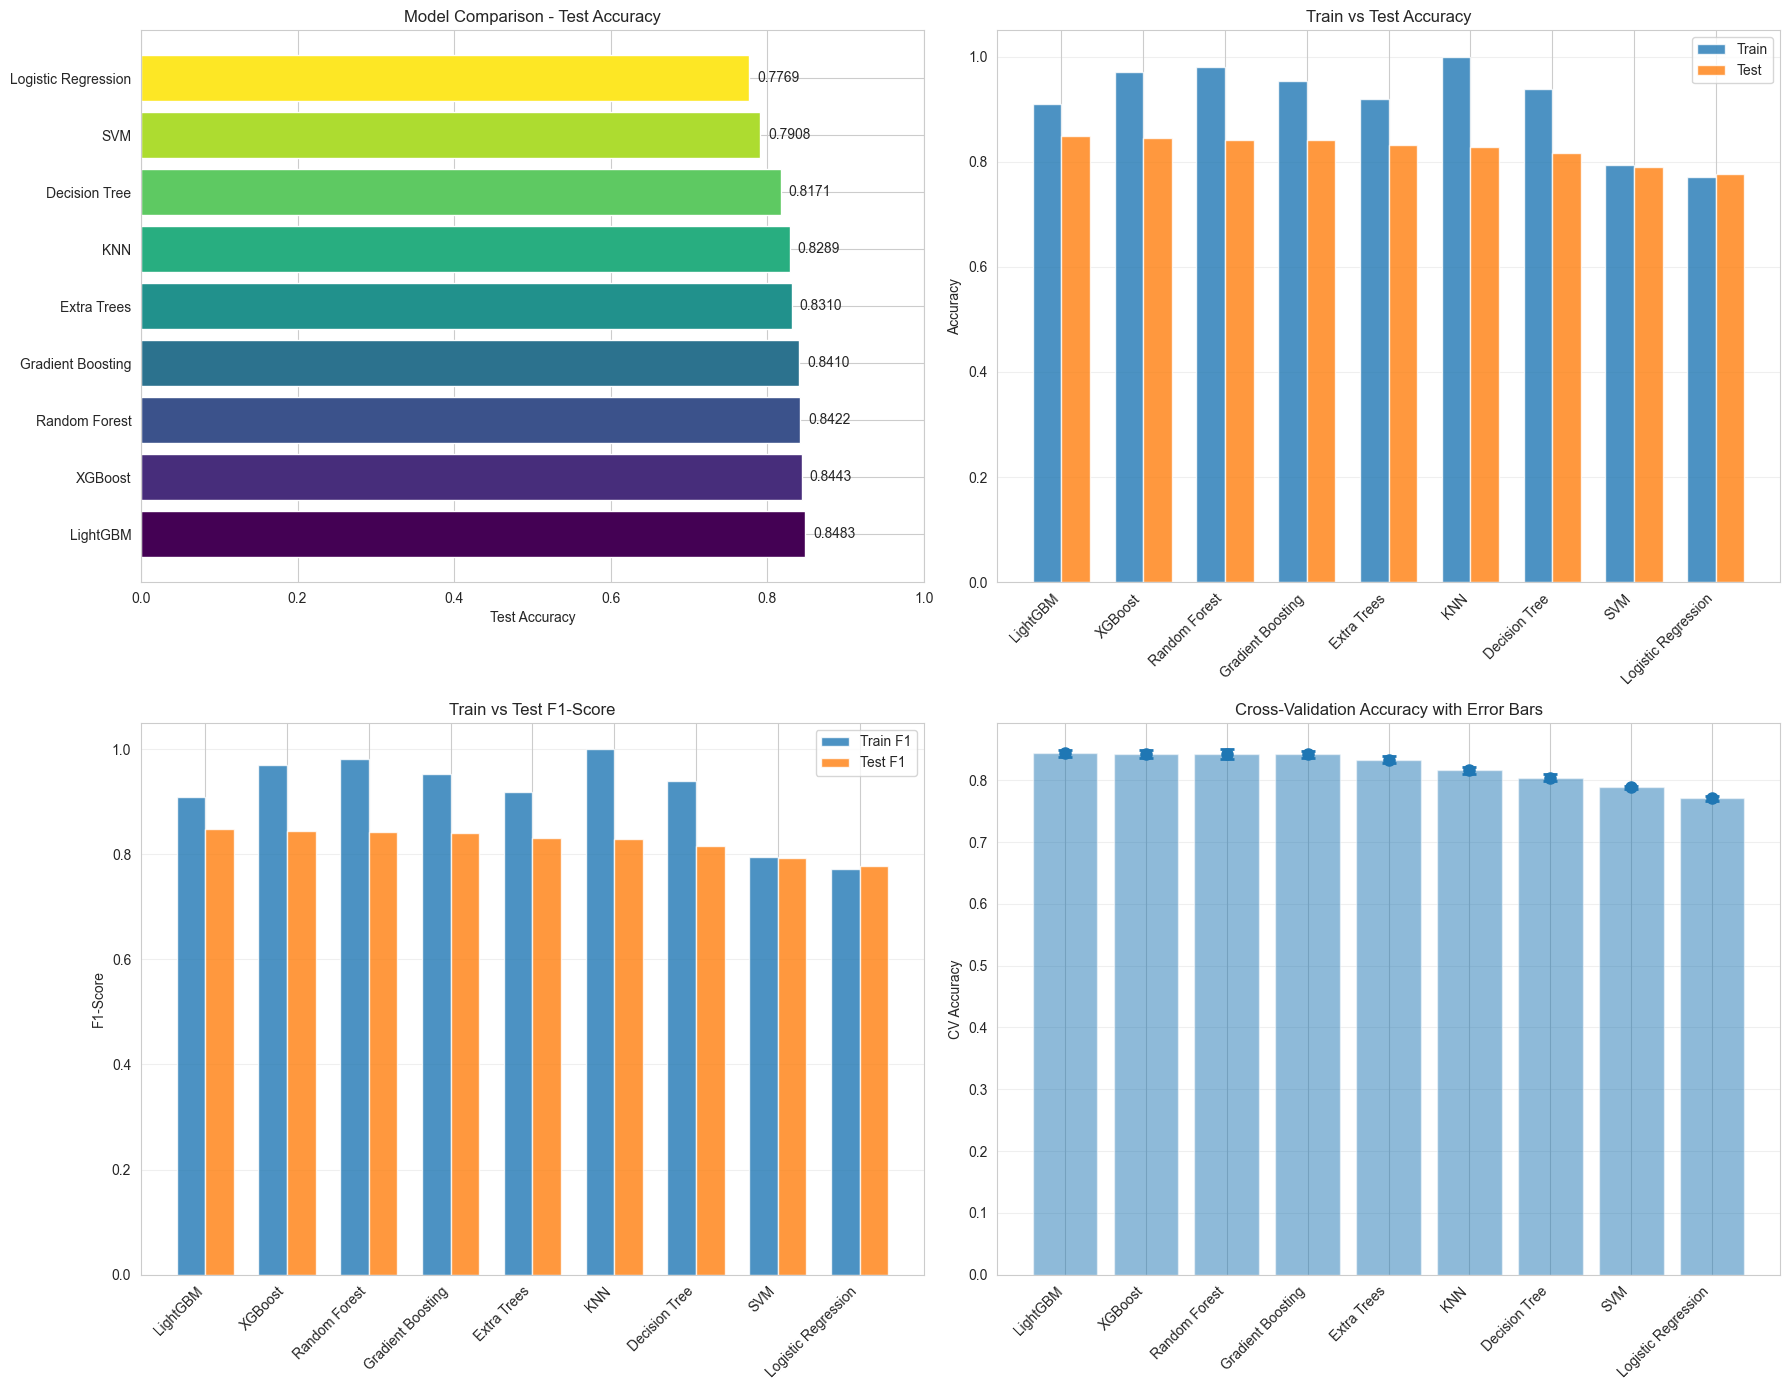

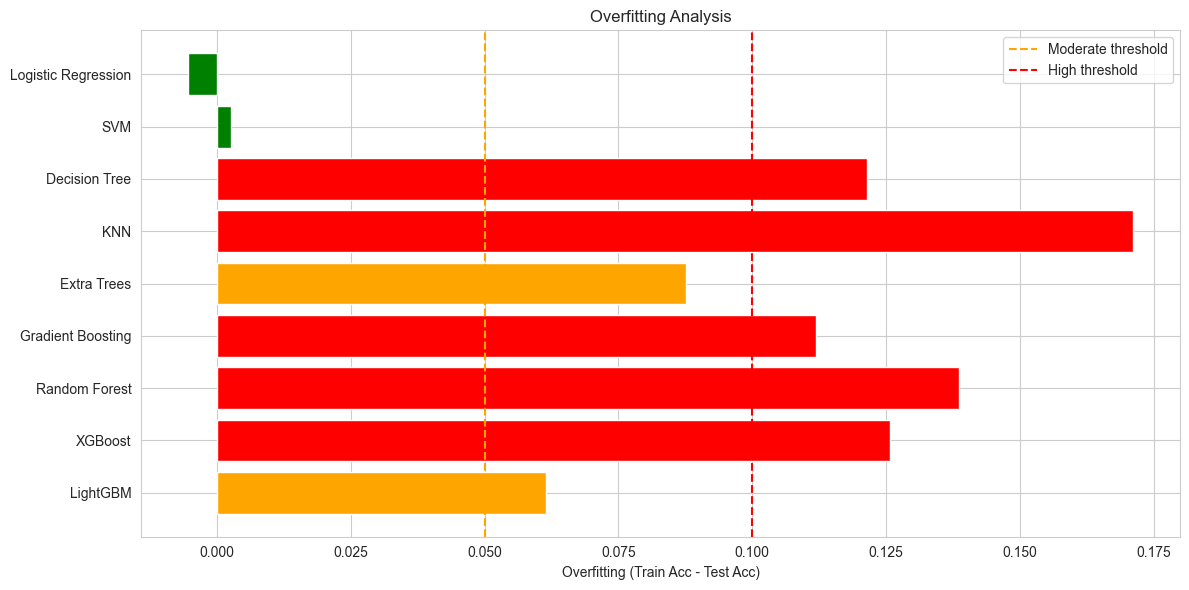

In [81]:
valid_results = {k: v for k, v in model_results.items() if v is not None}

if len(valid_results) == 0:
    print("No models were successfully trained!")
else:
    # Create comparison dataframe
    comparison_data = []
    for name, result in valid_results.items():
        comparison_data.append({
            'Model': name,
            'Train_Acc': result['train_accuracy'],
            'Test_Acc': result['test_accuracy'],
            'Train_F1': result['train_f1'],
            'Test_F1': result['test_f1'],
            'CV_Mean': result['cv_mean'],
            'CV_Std': result['cv_std'],
            'Overfit': result['train_accuracy'] - result['test_accuracy']
        })

    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('Test_Acc', ascending=False)

    print("\nMODEL PERFORMANCE COMPARISON:")
    print(comparison_df.to_string(index=False))

    # Visualization 1: Test Accuracy Comparison
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))

    # Test accuracy bar plot
    ax1 = axes[0, 0]
    models_sorted = comparison_df['Model']
    test_accs = comparison_df['Test_Acc']
    colors = plt.cm.viridis(np.linspace(0, 1, len(models_sorted)))
    bars = ax1.barh(models_sorted, test_accs, color=colors)
    ax1.set_xlabel('Test Accuracy')
    ax1.set_title('Model Comparison - Test Accuracy')
    ax1.set_xlim([0, 1])
    for i, (bar, val) in enumerate(zip(bars, test_accs)):
        ax1.text(val + 0.01, i, f'{val:.4f}', va='center')

    # Train vs Test Accuracy
    ax2 = axes[0, 1]
    x = np.arange(len(comparison_df))
    width = 0.35
    ax2.bar(x - width / 2, comparison_df['Train_Acc'], width, label='Train', alpha=0.8)
    ax2.bar(x + width / 2, comparison_df['Test_Acc'], width, label='Test', alpha=0.8)
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Train vs Test Accuracy')
    ax2.set_xticks(x)
    ax2.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)

    # F1-Score Comparison
    ax3 = axes[1, 0]
    ax3.bar(x - width / 2, comparison_df['Train_F1'], width, label='Train F1', alpha=0.8)
    ax3.bar(x + width / 2, comparison_df['Test_F1'], width, label='Test F1', alpha=0.8)
    ax3.set_ylabel('F1-Score')
    ax3.set_title('Train vs Test F1-Score')
    ax3.set_xticks(x)
    ax3.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax3.legend()
    ax3.grid(axis='y', alpha=0.3)

    # Cross-validation with error bars
    ax4 = axes[1, 1]
    ax4.errorbar(x, comparison_df['CV_Mean'], yerr=comparison_df['CV_Std'],
                 fmt='o', capsize=5, capthick=2, markersize=8)
    ax4.bar(x, comparison_df['CV_Mean'], alpha=0.5)
    ax4.set_ylabel('CV Accuracy')
    ax4.set_title('Cross-Validation Accuracy with Error Bars')
    ax4.set_xticks(x)
    ax4.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax4.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Overfitting analysis
    plt.figure(figsize=(12, 6))
    colors_overfit = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red'
                      for x in comparison_df['Overfit']]
    plt.barh(comparison_df['Model'], comparison_df['Overfit'], color=colors_overfit)
    plt.xlabel('Overfitting (Train Acc - Test Acc)')
    plt.title('Overfitting Analysis')
    plt.axvline(x=0.05, color='orange', linestyle='--', label='Moderate threshold')
    plt.axvline(x=0.1, color='red', linestyle='--', label='High threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [82]:
print("\n" + "=" * 80)
print("SELECTING BEST MODEL")
print("=" * 80)


SELECTING BEST MODEL



BEST MODEL: LightGBM

Performance Summary:
  Train Accuracy:  0.9098
  Test Accuracy:   0.8483
  Train F1-Score:  0.9096
  Test F1-Score:   0.8479
  CV Accuracy:     0.8437 (+/- 0.0058)
  Overfitting:     0.0615


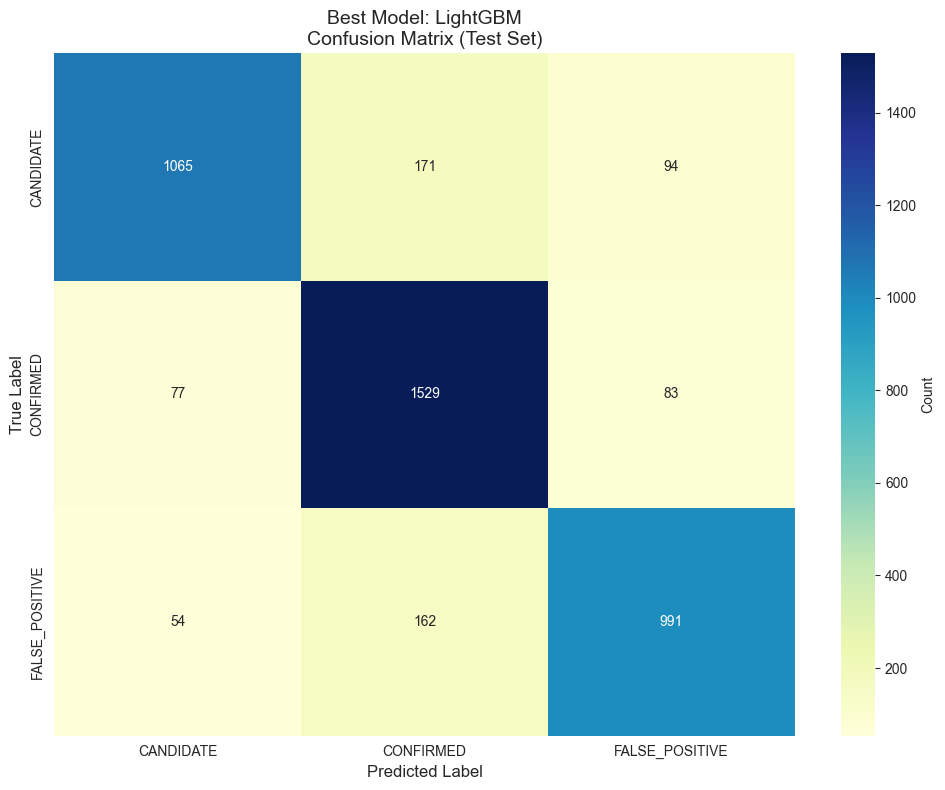


Detailed Classification Report:
                precision    recall  f1-score   support

     CANDIDATE       0.89      0.80      0.84      1330
     CONFIRMED       0.82      0.91      0.86      1689
FALSE_POSITIVE       0.85      0.82      0.83      1207

      accuracy                           0.85      4226
     macro avg       0.85      0.84      0.85      4226
  weighted avg       0.85      0.85      0.85      4226



In [83]:
if len(valid_results) > 0:
    best_model_name = comparison_df.iloc[0]['Model']
    best_model_result = valid_results[best_model_name]

    print(f"\nBEST MODEL: {best_model_name}")
    print(f"\nPerformance Summary:")
    print(f"  Train Accuracy:  {best_model_result['train_accuracy']:.4f}")
    print(f"  Test Accuracy:   {best_model_result['test_accuracy']:.4f}")
    print(f"  Train F1-Score:  {best_model_result['train_f1']:.4f}")
    print(f"  Test F1-Score:   {best_model_result['test_f1']:.4f}")
    print(f"  CV Accuracy:     {best_model_result['cv_mean']:.4f} (+/- {best_model_result['cv_std']:.4f})")
    print(f"  Overfitting:     {best_model_result['train_accuracy'] - best_model_result['test_accuracy']:.4f}")

    # Detailed confusion matrix for best model
    plt.figure(figsize=(10, 8))
    cm = best_model_result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_,
                cbar_kws={'label': 'Count'})
    plt.title(f'Best Model: {best_model_name}\nConfusion Matrix (Test Set)', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Per-class performance
    print(f"\nDetailed Classification Report:")
    print(classification_report(y_test, best_model_result['y_test_pred'],
                                target_names=label_encoder.classes_))


In [84]:
print("\n" + "=" * 80)
print("PREDICTION PROBABILITIES FOR ALL THREE CLASSES")
print("=" * 80)


PREDICTION PROBABILITIES FOR ALL THREE CLASSES



Sample Predictions (First 20 test samples):
----------------------------------------------------------------------------------------------------
Actual               Predicted            CANDIDATE       CONFIRMED       FALSE_POSITIVE 
----------------------------------------------------------------------------------------------------
CONFIRMED            CONFIRMED            0.0116          0.7855          0.2028          [CORRECT]
FALSE_POSITIVE       FALSE_POSITIVE       0.0003          0.0006          0.9990          [CORRECT]
FALSE_POSITIVE       FALSE_POSITIVE       0.1196          0.0139          0.8665          [CORRECT]
CANDIDATE            CANDIDATE            0.9995          0.0002          0.0003          [CORRECT]
CANDIDATE            CANDIDATE            0.9896          0.0049          0.0055          [CORRECT]
CANDIDATE            CANDIDATE            0.9822          0.0067          0.0111          [CORRECT]
CONFIRMED            CONFIRMED            0.0591          0.849

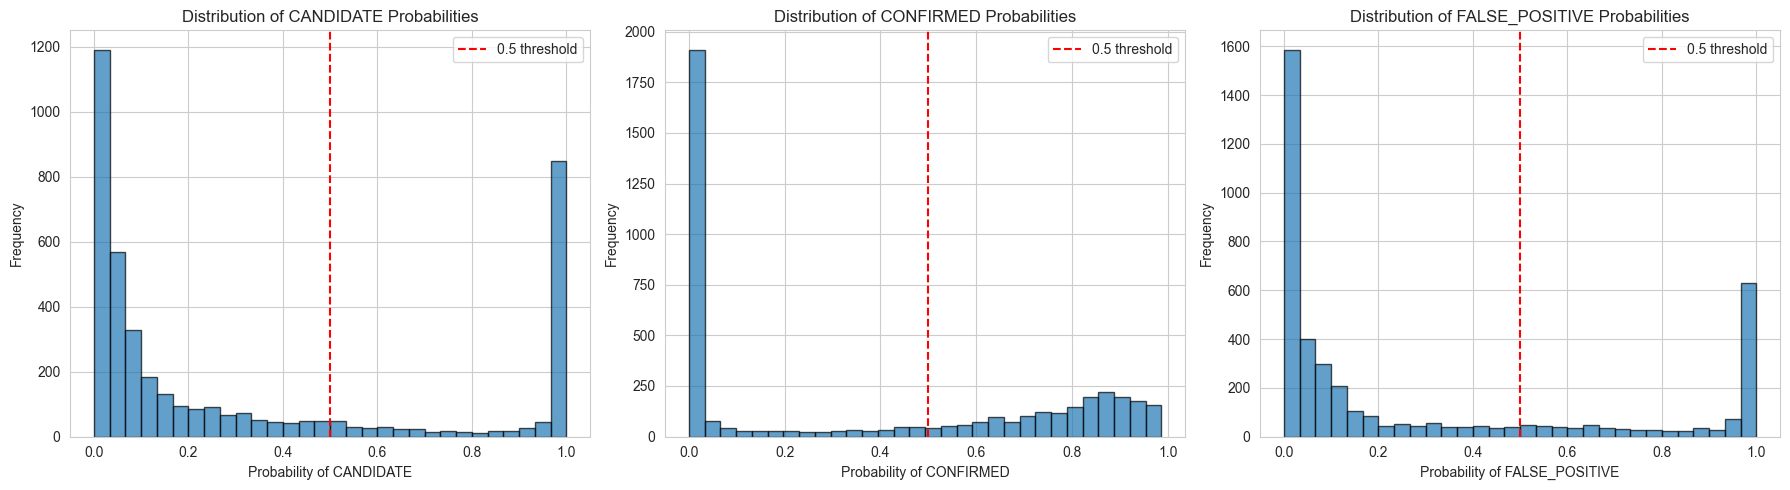


Confidence Analysis:
  Average confidence: 0.8462
  Min confidence: 0.3436
  Max confidence: 0.9998
  Std confidence: 0.1600


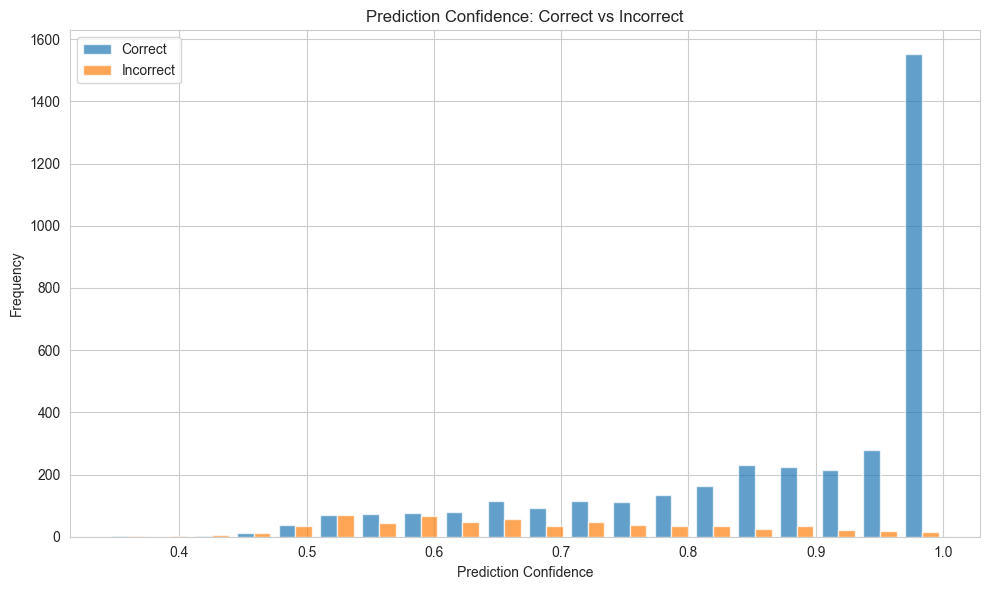

In [85]:
if best_model_result['y_test_proba'] is not None:
    y_proba = best_model_result['y_test_proba']

    # Show sample predictions
    print("\nSample Predictions (First 20 test samples):")
    print("-" * 100)
    print(f"{'Actual':<20} {'Predicted':<20} {'CANDIDATE':<15} {'CONFIRMED':<15} {'FALSE_POSITIVE':<15}")
    print("-" * 100)

    for i in range(min(20, len(y_test))):
        actual = label_encoder.classes_[y_test[i]]
        predicted = label_encoder.classes_[best_model_result['y_test_pred'][i]]

        status = "CORRECT" if actual == predicted else "WRONG"

        print(f"{actual:<20} {predicted:<20} "
              f"{y_proba[i][0]:.4f}          "
              f"{y_proba[i][1]:.4f}          "
              f"{y_proba[i][2]:.4f}          "
              f"[{status}]")

    # Probability distribution visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for idx, class_name in enumerate(label_encoder.classes_):
        axes[idx].hist(y_proba[:, idx], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel(f'Probability of {class_name}')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'Distribution of {class_name} Probabilities')
        axes[idx].axvline(x=0.5, color='r', linestyle='--', label='0.5 threshold')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

    # Confidence analysis
    max_probs = np.max(y_proba, axis=1)
    predicted_classes = np.argmax(y_proba, axis=1)
    correct_predictions = (predicted_classes == y_test)

    print(f"\nConfidence Analysis:")
    print(f"  Average confidence: {np.mean(max_probs):.4f}")
    print(f"  Min confidence: {np.min(max_probs):.4f}")
    print(f"  Max confidence: {np.max(max_probs):.4f}")
    print(f"  Std confidence: {np.std(max_probs):.4f}")

    # Confidence by correctness
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist([max_probs[correct_predictions], max_probs[~correct_predictions]],
            bins=20, label=['Correct', 'Incorrect'], alpha=0.7)
    ax.set_xlabel('Prediction Confidence')
    ax.set_ylabel('Frequency')
    ax.set_title('Prediction Confidence: Correct vs Incorrect')
    ax.legend()
    plt.tight_layout()
    plt.show()


In [86]:
print("\n" + "=" * 80)
print("SAVING MODEL PIPELINE")
print("=" * 80)


SAVING MODEL PIPELINE


In [87]:
# Prepare artifacts for saving
model_artifacts = {
    'best_model': best_model_result['model'],
    'best_model_name': best_model_name,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'feature_columns': feature_columns,
    'feature_engineering_params': {
        'correlation_threshold': 0.85,
        'features_dropped': features_to_drop
    },
    'performance_metrics': {
        'train_accuracy': best_model_result['train_accuracy'],
        'test_accuracy': best_model_result['test_accuracy'],
        'train_f1': best_model_result['train_f1'],
        'test_f1': best_model_result['test_f1'],
        'cv_mean': best_model_result['cv_mean'],
        'cv_std': best_model_result['cv_std']
    },
    'all_model_results': comparison_df.to_dict('records'),
    'class_names': label_encoder.classes_.tolist(),
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'dataset_info': {
        'total_samples': len(merged_data),
        'train_samples': len(X_train),
        'test_samples': len(X_test),
        'num_features': len(feature_columns)
    }
}

In [89]:
# Save to pickle file
filename = 'exoplanet_classification_complete_pipeline.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model_artifacts, f)

print(f"\nModel pipeline saved to: {filename}")
print(f"\nSaved components:")
print(f"  - Best model: {best_model_name}")
print(f"  - Scaler: StandardScaler")
print(f"  - Label encoder")
print(f"  - Feature columns ({len(feature_columns)} features)")
print(f"  - Performance metrics")
print(f"  - All model comparison results")

print("\n" + "=" * 80)
print("FINAL SUMMARY - EXOPLANET CLASSIFICATION SYSTEM")
print("=" * 80)

print(f"\nDATASET INFORMATION:")
print(f"  Total samples: {len(merged_data):,}")
print(f"  Training samples: {len(X_train):,}")
print(f"  Test samples: {len(X_test):,}")
print(f"  Number of features: {len(feature_columns)}")
print(f"  Number of classes: {len(label_encoder.classes_)}")
print(f"  Classes: {', '.join(label_encoder.classes_)}")

print(f"\nBEST MODEL: {best_model_name}")
print(f"  Test Accuracy: {best_model_result['test_accuracy']:.4f}")
print(f"  Test F1-Score: {best_model_result['test_f1']:.4f}")
print(f"  Cross-Validation: {best_model_result['cv_mean']:.4f} (+/- {best_model_result['cv_std']:.4f})")

print(f"\nMODELS EVALUATED: {len(valid_results)}")
for model_name in valid_results.keys():
    print(f"  - {model_name}")

print(f"\nSYSTEM CAPABILITIES:")
print(f"  Can predict three classes: CANDIDATE, CONFIRMED, FALSE_POSITIVE")
print(f"  Provides probability scores for each class")
print(f"  Ready for deployment on new exoplanet data")

print(f"\nFILES GENERATED:")
print(f"  - {filename}")

print("\n" + "=" * 80)
print("PIPELINE COMPLETED SUCCESSFULLY!")
print("=" * 80)


Model pipeline saved to: exoplanet_classification_complete_pipeline.pkl

Saved components:
  - Best model: LightGBM
  - Scaler: StandardScaler
  - Label encoder
  - Feature columns (18 features)
  - Performance metrics
  - All model comparison results

FINAL SUMMARY - EXOPLANET CLASSIFICATION SYSTEM

DATASET INFORMATION:
  Total samples: 21,126
  Training samples: 16,900
  Test samples: 4,226
  Number of features: 18
  Number of classes: 3
  Classes: CANDIDATE, CONFIRMED, FALSE_POSITIVE

BEST MODEL: LightGBM
  Test Accuracy: 0.8483
  Test F1-Score: 0.8479
  Cross-Validation: 0.8437 (+/- 0.0058)

MODELS EVALUATED: 9
  - Logistic Regression
  - Random Forest
  - Gradient Boosting
  - SVM
  - KNN
  - Decision Tree
  - Extra Trees
  - XGBoost
  - LightGBM

SYSTEM CAPABILITIES:
  Can predict three classes: CANDIDATE, CONFIRMED, FALSE_POSITIVE
  Provides probability scores for each class
  Ready for deployment on new exoplanet data

FILES GENERATED:
  - exoplanet_classification_complete_pip